# ANÁLISE DE DADOS DE MORTALIDADE POR SUICÍDIO

Pesquisas revelam que o Brasil está entre os 10 países onde o suicídio mais acontece.

Ressalte-se que os números são subdimensionados por causa do estigma e do preconceito associados ao suicídio. Entende-se que os transtornos mentais são uns dos principais transtornos preditores do suicídio, tendo como os cinco principais transtornos associados ao suicídio: a depressão, o transtorno bipolar, o abuso de álcool e outras drogas, a esquizofrenia e o transtorno de personalidade Borderline.

A pesquisa diagnótica visa orientar a qualificação da saúde mental no país, além de identificar os fatores relacionados aos casos de suicídio através das informações coletadas, observando o crescimento recente dos óbitos por suicídio, especialmente entre os jovens e crianças.

Os dados foram coletados do sistema de Mortalidade do sistema Datasus, do Ministério da Saúde do Brasil, com dados entre os anos de 2011 a 2021, com o objetivo de identificar fatores sociais, econômicos, culturais e psicológicos através dos dados disponíveis. Tendo sido selecionados os registros com perfil de mortalidade pela causa suicídio, de acordo com a coluna CIRCOBITO (circunstâncias em que se deu o óbito de forma não natural).

Além dos tratamentos adequados, desmistificar e aprofundar informações e conhecimentos acerca do tema é uma importante estratégia de prevenção.


## 1. Instalando e Carregando os Pacotes:

In [1]:
# Versão da linguagem python:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
!pip install -q missingno

In [4]:
!pip install -q category_encoders

In [5]:
!pip install -q plotly

In [6]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np
import os

# Visualização
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno
%matplotlib inline
sns.set()

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Datas
from datetime import datetime, timedelta

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Carregando os Dados e Compreendendo as Variáveis

In [7]:
# Lista todos os arquivos csv do diretório

files = os.listdir("dados")
files

['CID10',
 'MortalidadeGeral2011.csv',
 'MortalidadeGeral2012.csv',
 'MortalidadeGeral2013.csv',
 'MortalidadeGeral2014.csv',
 'MortalidadeGeral2015.csv',
 'MortalidadeGeral2016.csv',
 'MortalidadeGeral2017.csv',
 'MortalidadeGeral2018.csv',
 'MortalidadeGeral2019.csv',
 'MortalidadeGeral2020.csv',
 'MortalidadeGeral2021.csv',
 'municipios']

In [8]:
# Carregando um DataFrame para cada ano para análise da equivalência das colunas
# Explicitando o tipo de enconding para coincidir com o método de conversão dos dados
dados2011 =  pd.read_csv('dados/MortalidadeGeral2011.csv', sep=';', encoding='latin-1')
dados2012 =  pd.read_csv('dados/MortalidadeGeral2012.csv', sep=';', encoding='latin-1')
dados2013 =  pd.read_csv('dados/MortalidadeGeral2013.csv', sep=';', encoding='latin-1')
dados2014 =  pd.read_csv('dados/MortalidadeGeral2014.csv', sep=';', encoding='latin-1')
dados2015 =  pd.read_csv('dados/MortalidadeGeral2015.csv', sep=';', encoding='latin-1')
dados2016 =  pd.read_csv('dados/MortalidadeGeral2016.csv', sep=';', encoding='latin-1')
dados2017 =  pd.read_csv('dados/MortalidadeGeral2017.csv', sep=';', encoding='latin-1')
dados2018 =  pd.read_csv('dados/MortalidadeGeral2018.csv', sep=';', encoding='latin-1')
dados2019 =  pd.read_csv('dados/MortalidadeGeral2019.csv', sep=';', encoding='latin-1')
dados2020 =  pd.read_csv('dados/MortalidadeGeral2020.csv', sep=';', encoding='latin-1')
dados2021 =  pd.read_csv('dados/MortalidadeGeral2021.csv', sep=';', encoding='latin-1')

In [9]:
dados2011.shape

(1170498, 62)

In [10]:
dados2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181166 entries, 0 to 1181165
Data columns (total 76 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CONTADOR    1181166 non-null  int64  
 1   ORIGEM      1181166 non-null  int64  
 2   TIPOBITO    1181166 non-null  int64  
 3   CODMUNCART  30769 non-null    float64
 4   NUMREGCART  26185 non-null    float64
 5   DTREGCART   26876 non-null    float64
 6   DTOBITO     1181166 non-null  int64  
 7   HORAOBITO   1110054 non-null  object 
 8   NATURAL     68968 non-null    float64
 9   DTNASC      1174784 non-null  float64
 10  IDADE       1181166 non-null  int64  
 11  SEXO        1181166 non-null  int64  
 12  RACACOR     1115870 non-null  float64
 13  ESTCIV      1083906 non-null  float64
 14  ESC         1091113 non-null  float64
 15  SERIESCFAL  138758 non-null   float64
 16  ESCMAEAGR1  2 non-null        float64
 17  ESCFALAGR1  130 non-null      float64
 18  OCUP        888407 non

In [11]:
dados2011.head()

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,...,DTRECORIGA,CAUSAMAT,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,DTCADINV,TPOBITOCOR,DTCADINF,MORTEPARTO
0,1,1,2,10052011,NaN,NaN,7091926.0,484,1,4.0,...,2062011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
1,2,1,2,23062011,300.0,NaN,28061982.0,428,1,1.0,...,2082011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
2,3,1,2,28082011,2100.0,NaN,16121952.0,458,2,4.0,...,17102011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
3,4,1,2,17112011,600.0,NaN,20061941.0,470,1,4.0,...,15122011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN
4,5,1,2,29072011,820.0,812.0,13121993.0,417,1,4.0,...,2082011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN


In [12]:
# Ampliando a visualização das colunas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',110)

In [13]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2011)
dados2011.CIRCOBITO.value_counts()

1.0    68776
3.0    49851
9.0    15417
2.0     9316
4.0     2478
Name: CIRCOBITO, dtype: int64

In [14]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio (ANO: 2011)
novodados2011 = dados2011.query('CIRCOBITO == 2')
novodados2011['ANO'] = 2011
novodados2011.shape

(9316, 63)

In [15]:
novodados2011.head()

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,ESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,GESTACAO,PARTO,OBITOPARTO,PESO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,COMUNSVOIM,DTATESTADO,CIRCOBITO,ACIDTRAB,FONTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,FONTEINV,DTRECEBIM,DTRECORIG,DTRECORIGA,CAUSAMAT,ESC2010,ESCMAE2010,STDOEPIDEM,STDONOVA,DTCADINV,TPOBITOCOR,DTCADINF,MORTEPARTO,ANO
425,426,1,2,8022011,200.0,NaN,30121992.0,418,1,4.0,NaN,NaN,NaN,120030,5,NaN,120030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*T71X,*X709,NaN,NaN,NaN,X709,NaN,8022011.0,2.0,NaN,9.0,NaN,NaN,X709,23022011.0,3.0,NaN,10032011.0,10032011.0,10032011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,2011
428,429,1,2,9012011,NaN,812.0,6071972.0,438,1,4.0,2.0,9.0,NaN,120020,3,NaN,120020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,*T71X,*X709,NaN,NaN,NaN,X709,NaN,10012011.0,2.0,NaN,3.0,NaN,NaN,X709,20012011.0,3.0,NaN,8022011.0,8022011.0,8022011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,2011
627,628,1,2,18062011,1200.0,812.0,26021980.0,431,1,NaN,9.0,9.0,771105.0,120042,3,NaN,120042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,*T71X,NaN,*X702,NaN,NaN,X702,NaN,18062011.0,2.0,NaN,3.0,NaN,NaN,X702,4072011.0,3.0,NaN,15072011.0,15072011.0,15072011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,2011
777,778,1,2,10012011,100.0,812.0,20051984.0,426,1,1.0,1.0,3.0,NaN,120040,3,NaN,120040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*X700,NaN,NaN,NaN,NaN,X700,NaN,10012011.0,2.0,NaN,1.0,N,NaN,X700,22022011.0,3.0,NaN,11032011.0,11032011.0,11032011.0,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,2011
907,908,1,2,22042011,117.0,NaN,23021964.0,447,1,4.0,2.0,9.0,999993.0,120060,1,2000121.0,120060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,*T659,NaN,NaN,NaN,NaN,X690,NaN,22042011.0,2.0,NaN,3.0,N,NaN,X690,24052011.0,1.0,NaN,24052011.0,24052011.0,24052011.0,NaN,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,2011


In [16]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2012)
dados2012.CIRCOBITO.value_counts()

1.0    70120
3.0    53767
9.0    14880
2.0     9730
4.0     2593
1        475
9        147
3        123
2         58
4         46
C          1
Name: CIRCOBITO, dtype: int64

In [17]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio (ANO: 2012)
novodados2012 = dados2012.query('CIRCOBITO == 2 or CIRCOBITO == "2" ')
novodados2012['ANO'] = 2012
novodados2012.shape

(9788, 77)

In [18]:
# Convertendo o tipo CIRCOBITO para float, em razão da identificação de registros com valor do tipo string
# também e conferindo na sequência a conversão de do tipo objeto para float
novodados2012['CIRCOBITO'] = novodados2012['CIRCOBITO'].astype(float)
novodados2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9788 entries, 69 to 1180870
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CONTADOR    9788 non-null   int64  
 1   ORIGEM      9788 non-null   int64  
 2   TIPOBITO    9788 non-null   int64  
 3   CODMUNCART  228 non-null    float64
 4   NUMREGCART  171 non-null    float64
 5   DTREGCART   176 non-null    float64
 6   DTOBITO     9788 non-null   int64  
 7   HORAOBITO   7260 non-null   object 
 8   NATURAL     419 non-null    float64
 9   DTNASC      9721 non-null   float64
 10  IDADE       9788 non-null   int64  
 11  SEXO        9788 non-null   int64  
 12  RACACOR     9422 non-null   float64
 13  ESTCIV      9447 non-null   float64
 14  ESC         9387 non-null   float64
 15  SERIESCFAL  1837 non-null   float64
 16  ESCMAEAGR1  0 non-null      float64
 17  ESCFALAGR1  1 non-null      float64
 18  OCUP        7284 non-null   float64
 19  CODMUNRES   9788 non-nu

In [19]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2013)
dados2013.CIRCOBITO.value_counts()

1.0    69807
3.0    54499
9.0    14726
2.0    10082
4.0     2473
Name: CIRCOBITO, dtype: int64

In [20]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2013)
novodados2013 = dados2013.query('CIRCOBITO == 2')
novodados2013['ANO'] = 2013
novodados2013.shape

(10082, 73)

In [21]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2014)
dados2014.CIRCOBITO.value_counts()

1.0    71795
3.0    57374
9.0    14774
2.0    10233
4.0     2685
Name: CIRCOBITO, dtype: int64

In [22]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2014)
novodados2014 = dados2014.query('CIRCOBITO == 2')
novodados2014['ANO'] = 2014
novodados2014.shape

(10233, 88)

In [23]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2015)
dados2015.CIRCOBITO.value_counts()

1.0    67117
3.0    55895
9.0    15648
2.0    10548
4.0     2834
Name: CIRCOBITO, dtype: int64

In [24]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2015)
novodados2015 = dados2015.query('CIRCOBITO == 2')
novodados2015['ANO'] = 2015
novodados2015.shape

(10548, 88)

In [25]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2016)
dados2016.CIRCOBITO.value_counts()

1.0    65871
3.0    58015
9.0    17969
2.0    10690
4.0     3332
Name: CIRCOBITO, dtype: int64

In [26]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2016)
novodados2016 = dados2016.query('CIRCOBITO == 2')
novodados2016['ANO'] = 2016
novodados2016.shape

(10690, 88)

In [27]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2017)
dados2017.CIRCOBITO.value_counts()

1.0    64158
3.0    61023
9.0    17940
2.0    11820
4.0     4138
Name: CIRCOBITO, dtype: int64

In [28]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2017)
novodados2017 = dados2017.query('CIRCOBITO == 2')
novodados2017['ANO'] = 2017
novodados2017.shape

(11820, 88)

In [29]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2018)
dados2018.CIRCOBITO.value_counts()

1.0    61951
3.0    53690
9.0    18621
2.0    12262
4.0     4382
Name: CIRCOBITO, dtype: int64

In [30]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2018)
novodados2018 = dados2018.query('CIRCOBITO == 2')
novodados2018['ANO'] = 2018
novodados2018.shape

(12262, 88)

In [31]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2019)
dados2019.CIRCOBITO.value_counts()

1.0    60215
3.0    42039
9.0    23264
2.0    13009
4.0     3996
Name: CIRCOBITO, dtype: int64

In [32]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2019)
novodados2019 = dados2019.query('CIRCOBITO == 2')
novodados2019['ANO'] = 2019
novodados2019.shape

(13009, 88)

In [33]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2020)
dados2020.CIRCOBITO.value_counts()

1.0    61751
3.0    45687
9.0    20384
2.0    13167
4.0     4692
Name: CIRCOBITO, dtype: int64

In [34]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2020)
novodados2020 = dados2020.query('CIRCOBITO == 2')
novodados2020['ANO'] = 2020
novodados2020.shape

(13167, 88)

In [35]:
# Verificando a quantidade de registros por tipo de morte ou circuntâncias em que se deu a morte não natural (ANO: 2021)
dados2021.CIRCOBITO.value_counts()

1.0    63638
3.0    43392
9.0    22367
2.0    14724
4.0     4912
Name: CIRCOBITO, dtype: int64

In [36]:
# Filtrando apenas os registros que se deseja analisar que são as mortes indicadas como suicídio  (ANO: 2021)
novodados2021 = dados2021.query('CIRCOBITO == 2')
novodados2021['ANO'] = 2021
novodados2021.shape

(14724, 88)

In [37]:
# Analisando total de colunas por dataset
count_array = np.array([['2011', len(novodados2011.columns)],
                        ['2012', len(novodados2012.columns)],
                        ['2013', len(novodados2013.columns)],
                        ['2014', len(novodados2014.columns)],
                        ['2015', len(novodados2015.columns)],
                        ['2016', len(novodados2016.columns)],
                        ['2017', len(novodados2017.columns)],
                        ['2018', len(novodados2018.columns)],
                        ['2019', len(novodados2019.columns)],
                        ['2020', len(novodados2020.columns)],
                        ['2021', len(novodados2021.columns)]])
count_columns = pd.DataFrame(count_array, columns = ['Ano', 'Total de Colunas'])
count_columns

,Ano,Total de Colunas
0,2011,63
1,2012,77
2,2013,73
3,2014,88
4,2015,88
5,2016,88
6,2017,88
7,2018,88
8,2019,88
9,2020,88


In [38]:
# Existem número de colunas diferentes nos anos de 2011 a 2013.
# Identificando se estas colunas podem ser relevantes para a análise

df_compara_colunas = (pd.concat([pd.Series(novodados2011.columns.tolist()), pd.Series(novodados2012.columns.tolist()),
                                pd.Series(novodados2013.columns.tolist()), pd.Series(novodados2014.columns.tolist())],
                                axis = 1))
df_compara_colunas_rename = df_compara_colunas.rename(columns = {0:'2011',1:'2012',2:'2013',3:'2014'})
df_compara_colunas_rename

,2011,2012,2013,2014
0,CONTADOR,CONTADOR,CONTADOR,CONTADOR
1,ORIGEM,ORIGEM,ORIGEM,ORIGEM
2,TIPOBITO,TIPOBITO,TIPOBITO,TIPOBITO
3,DTOBITO,CODMUNCART,CODMUNCART,DTOBITO
4,HORAOBITO,NUMREGCART,NUMREGCART,HORAOBITO
5,NATURAL,DTREGCART,DTREGCART,NATURAL
6,DTNASC,DTOBITO,DTOBITO,CODMUNNATU
7,IDADE,HORAOBITO,HORAOBITO,DTNASC
8,SEXO,NATURAL,NATURAL,IDADE
9,RACACOR,DTNASC,DTNASC,SEXO


In [39]:
# Combinando os arquivos csv dos anos de 2011 a 2021, gerando um novo índice
dadosgeral = (pd.concat([novodados2011,novodados2012,novodados2013,novodados2014,novodados2015,novodados2016,novodados2017,
                       novodados2018,novodados2019,novodados2020,novodados2021], ignore_index=True))

In [40]:
dadosgeral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125639 entries, 0 to 125638
Data columns (total 93 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CONTADOR    125639 non-null  int64  
 1   ORIGEM      125639 non-null  int64  
 2   TIPOBITO    125639 non-null  int64  
 3   DTOBITO     125639 non-null  int64  
 4   HORAOBITO   97534 non-null   object 
 5   NATURAL     95888 non-null   float64
 6   DTNASC      125175 non-null  float64
 7   IDADE       125639 non-null  int64  
 8   SEXO        125639 non-null  int64  
 9   RACACOR     122760 non-null  float64
 10  ESTCIV      121880 non-null  float64
 11  ESC         117990 non-null  float64
 12  OCUP        99811 non-null   float64
 13  CODMUNRES   125639 non-null  int64  
 14  LOCOCOR     125639 non-null  float64
 15  CODESTAB    19643 non-null   object 
 16  CODMUNOCOR  125639 non-null  int64  
 17  IDADEMAE    1 non-null       float64
 18  ESCMAE      1 non-null       float64
 19  OC

In [41]:
dadosgeral.shape

(125639, 93)

## 2. Análise Exporatória

In [42]:
# Verificando percentual de valores ausentes por coluna
# Total de valores ausentes
def valores_ausentes_por_coluna(df):
    val_ausentes = df.isnull().sum()

    # Porcentagem de valores ausentes
    percentual_val_ausentes = 100 * val_ausentes / len(df)

    # Tipo de dado das colunas com valores ausentes
    tipo_val_ausentes = df.dtypes

    # Criando uma tabela com os resultados
    tabela_ausentes = pd.concat([val_ausentes, percentual_val_ausentes, tipo_val_ausentes], axis=1)

    # Renomear as colunas
    tabela_ausentes_colunas = tabela_ausentes.rename(
    columns = {0 : 'Valores Ausentes', 1 : '% de Valores Ausentes', 2: 'Dtype'})

    # Classifica a tabela por porcentagem de valores ausentes de forma decrescente e remove colunas sem valores faltantes
    tabela_ausentes_colunas = (tabela_ausentes_colunas[tabela_ausentes_colunas.iloc[:,0] != 0].
                               sort_values('% de Valores Ausentes', ascending = False).round(2))

    print ("O dataset tem " + str(df.shape[1]) + " colunas.\n"
           "Foi encontrado: " + str(tabela_ausentes_colunas.shape[0]) + " colunas que têm valores ausentes.")

    # Retorna o dataframe com informações ausentes
    return tabela_ausentes_colunas


In [43]:
# Chamando a função que exibe valores ausentes por coluna
# Criando tabela com valores ausentes
dados_ausentes = valores_ausentes_por_coluna(dadosgeral)

O dataset tem 93 colunas.
Foi encontrado: 81 colunas que têm valores ausentes.


In [44]:
# Visualizando tabela com colunas com valores ausentes
dados_ausentes

,Valores Ausentes,% de Valores Ausentes,Dtype
DTCONCASO,125639,100.00,float64
NUDIASINF,125639,100.00,float64
SERIESCMAE,125639,100.00,float64
OCUPMAE,125639,100.00,float64
QTDFILVIVO,125638,100.00,float64
PESO,125638,100.00,float64
OBITOPARTO,125638,100.00,float64
PARTO,125638,100.00,float64
GESTACAO,125638,100.00,float64
GRAVIDEZ,125638,100.00,float64


In [45]:
# Devido à fraca interpretabilidade dos valores ausentes de algumas variáveis ou que não serão inerentes à análise pretendida
# Removendo colunas com mais de 20% de valores ausentes.
# Com exceção da coluna 'TPPOS', a qual indica se o óbito foi investigado
# Colunas que serão removidas.
colunas_para_remover = dados_ausentes[dados_ausentes['% de Valores Ausentes'] >= 20.00].index.tolist()
colunas_para_remover = [col for col in colunas_para_remover if col not in ['TPPOS']]
colunas_para_remover

['DTCONCASO',
 'NUDIASINF',
 'SERIESCMAE',
 'OCUPMAE',
 'QTDFILVIVO',
 'PESO',
 'OBITOPARTO',
 'PARTO',
 'GESTACAO',
 'GRAVIDEZ',
 'QTDFILMORT',
 'ESCMAE2010',
 'CB_PRE',
 'IDADEMAE',
 'SEMAGESTAC',
 'ESCMAEAGR1',
 'ESCMAE',
 'MORTEPARTO',
 'DTCADINF',
 'ALTCAUSA',
 'ESTABDESCR',
 'CAUSAMAT',
 'ACIDTRAB',
 'TPRESGINFO',
 'EXAME',
 'CIRURGIA',
 'EXPDIFDATA',
 'NUMREGCART',
 'DTREGCART',
 'CODMUNCART',
 'FONTES',
 'NUDIASOBIN',
 'LINHAD',
 'LINHAII',
 'FONTESINF',
 'NUDIASOBCO',
 'TPNIVELINV',
 'DTCONINV',
 'TPMORTEOCO',
 'OBITOPUERP',
 'OBITOGRAV',
 'TPOBITOCOR',
 'DTCADINV',
 'CODESTAB',
 'LINHAC',
 'DTRECORIG',
 'SERIESCFAL',
 'DTINVESTIG',
 'FONTEINV',
 'ESCFALAGR1',
 'LINHAB',
 'VERSAOSCB',
 'CODMUNNATU',
 'NATURAL',
 'NUMEROLOTE',
 'VERSAOSIST',
 'CODIFICADO',
 'STCODIFICA',
 'ATESTADO',
 'HORAOBITO',
 'ASSISTMED',
 'OCUP']

In [46]:
# Drop das colunas e criando um novo dataset
dadosgeral_limpo = dadosgeral.drop(colunas_para_remover,axis=1).reset_index()

In [47]:
dadosgeral_limpo.shape

(125639, 32)

In [48]:
dadosgeral_limpo.head()

,index,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,NECROPSIA,LINHAA,CAUSABAS,COMUNSVOIM,DTATESTADO,CIRCOBITO,FONTE,TPPOS,CAUSABAS_O,DTCADASTRO,ATESTANTE,DTRECEBIM,DTRECORIGA,ESC2010,STDOEPIDEM,STDONOVA,ANO,DIFDATA
0,0,426,1,2,8022011,30121992.0,418,1,4.0,NaN,NaN,120030,5.0,120030,NaN,*T71X,X709,NaN,8022011.0,2.0,9.0,NaN,X709,23022011.0,3.0,10032011.0,10032011.0,NaN,0.0,0.0,2011,NaN
1,1,429,1,2,9012011,6071972.0,438,1,4.0,2.0,9.0,120020,3.0,120020,1.0,*T71X,X709,NaN,10012011.0,2.0,3.0,NaN,X709,20012011.0,3.0,8022011.0,8022011.0,NaN,0.0,0.0,2011,NaN
2,2,628,1,2,18062011,26021980.0,431,1,NaN,9.0,9.0,120042,3.0,120042,1.0,*T71X,X702,NaN,18062011.0,2.0,3.0,NaN,X702,4072011.0,3.0,15072011.0,15072011.0,NaN,0.0,0.0,2011,NaN
3,3,778,1,2,10012011,20051984.0,426,1,1.0,1.0,3.0,120040,3.0,120040,NaN,*X700,X700,NaN,10012011.0,2.0,1.0,N,X700,22022011.0,3.0,11032011.0,11032011.0,NaN,0.0,0.0,2011,NaN
4,4,908,1,2,22042011,23021964.0,447,1,4.0,2.0,9.0,120060,1.0,120060,NaN,*T659,X690,NaN,22042011.0,2.0,3.0,N,X690,24052011.0,1.0,24052011.0,24052011.0,NaN,0.0,1.0,2011,NaN


In [49]:
# Conforme o dicionário de dados o campo idade é representado pela regra
# Idade do falecido em minutos, horas, dias, meses ou anos. (Idade: composto de dois subcampos. 
# O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto, se 2 = hora, se 3 = mês, se 4 = ano,
# se = 5 idade maior que 100 anos). 
# O segundo, de dois dígitos, indica a quantidade de unidades: Idade menor de 1 hora: subcampo varia de 01 e 59 (minutos);
# De 1 a 23 Horas: subcampo varia de 01 a 23 (horas); De 24 horas e 29 dias: subcampo varia de 01 a 29 (dias);
# De 1 a menos de 12 meses completos: subcampo varia de 01 a 11 (meses); Anos - subcampo varia de 00 a 99; - 9 - ignorado)
# Foi considerada o campo idade em razão do campo data de nascimento conter alguns registros nulos
# Confirmando o tipo de dados do campo IDADE
dadosgeral_limpo.IDADE.dtype

dtype('int64')

In [50]:
# Criando novo DataFrame, filtrando pelo primeiro, de 1 dígito (4), que indica a unidade da idade em anos e excluir eventuais
# registros com crianças abaixo de 5 anos
dadosgeral_idade = dadosgeral_limpo.query('IDADE > 404')
dadosgeral_idade.shape

(125634, 32)

In [51]:
dadosgeral_idade.IDADE.isnull().sum()

0

In [52]:
# Criando nova coluna idade representando a idade real na data do óbito,conforme dicionário de dados: subcampo de 00 a 99
# Convertendo idade óbito para inteiro novamente
dadosgeral_idade['IDADEOBITO']= (np.where(dadosgeral_idade['IDADE'] >= 500, 100,
                                         dadosgeral_idade['IDADE'].astype(str).str.slice(1,3)))
dadosgeral_idade['IDADEOBITO']=pd.to_numeric(dadosgeral_idade['IDADEOBITO'])

In [53]:
dadosgeral_idade.sort_values(by="IDADEOBITO")

,index,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,NECROPSIA,LINHAA,CAUSABAS,COMUNSVOIM,DTATESTADO,CIRCOBITO,FONTE,TPPOS,CAUSABAS_O,DTCADASTRO,ATESTANTE,DTRECEBIM,DTRECORIGA,ESC2010,STDOEPIDEM,STDONOVA,ANO,DIFDATA,IDADEOBITO
87155,87155,275053,1,2,19032019,23022014.0,405,2,4.0,NaN,NaN,160030,3.0,160030,1.0,*T71X,Y349,160030.0,19032019.0,2.0,4.0,N,X700,5042019.0,3.0,2092019.0,8042019.0,NaN,0.0,1.0,2019,167.0,5
23290,23290,17874,1,2,31072013,17052008.0,405,2,4.0,NaN,NaN,250970,4.0,250970,1.0,*T659,Y349,250400.0,1082013.0,2.0,NaN,N,X689,11092013.0,3.0,9102013.0,NaN,NaN,0.0,1.0,2013,70.0,5
47860,47860,7234,1,2,21022015,15082008.0,406,1,1.0,1.0,1.0,350540,5.0,350540,NaN,*T794,Y349,354260.0,22022015.0,2.0,1.0,N,X74,20032015.0,3.0,23032015.0,23032015.0,0.0,0.0,1.0,2015,30.0,6
65306,65306,339,1,2,21012017,10042009.0,407,1,4.0,1.0,NaN,150140,3.0,150140,1.0,*T71X,X700,150140.0,22012017.0,2.0,1.0,S,Y200,7032017.0,3.0,28022019.0,9032017.0,NaN,0.0,1.0,2017,768.0,7
68876,68876,46533,1,2,6082017,8102009.0,407,1,4.0,1.0,NaN,431440,3.0,431440,1.0,*X740*S062*S068,X740,431440.0,7082017.0,2.0,1.0,N,X740,24082017.0,3.0,29082017.0,29082017.0,NaN,0.0,1.0,2017,23.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77454,77454,1026446,1,2,2092018,NaN,999,1,NaN,9.0,9.0,150810,5.0,150795,1.0,*X719,X719,150420.0,2092018.0,2.0,1.0,NaN,X719,9112018.0,3.0,24012020.0,29112018.0,9.0,0.0,1.0,2018,509.0,100
92937,92937,878859,1,2,13122019,NaN,999,1,1.0,NaN,NaN,350000,4.0,354870,1.0,*T71X,X704,354870.0,13122019.0,2.0,1.0,N,X704,3012020.0,3.0,19022020.0,8012020.0,NaN,0.0,1.0,2019,68.0,100
77552,77552,1236299,1,2,26122018,NaN,999,1,NaN,NaN,NaN,150080,5.0,150080,1.0,*T71X,X709,150140.0,26122018.0,2.0,1.0,NaN,X709,14022019.0,3.0,21022019.0,21022019.0,NaN,0.0,1.0,2018,57.0,100
7343,7343,2867,1,2,14012011,NaN,999,1,1.0,NaN,NaN,354990,5.0,354990,1.0,*T71X,X709,NaN,14012011.0,2.0,1.0,NaN,X709,16022011.0,3.0,27042011.0,2032011.0,NaN,0.0,0.0,2011,NaN,100


In [54]:
dadosgeral_idade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 125638
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       125634 non-null  int64  
 1   CONTADOR    125634 non-null  int64  
 2   ORIGEM      125634 non-null  int64  
 3   TIPOBITO    125634 non-null  int64  
 4   DTOBITO     125634 non-null  int64  
 5   DTNASC      125171 non-null  float64
 6   IDADE       125634 non-null  int64  
 7   SEXO        125634 non-null  int64  
 8   RACACOR     122755 non-null  float64
 9   ESTCIV      121880 non-null  float64
 10  ESC         117989 non-null  float64
 11  CODMUNRES   125634 non-null  int64  
 12  LOCOCOR     125634 non-null  float64
 13  CODMUNOCOR  125634 non-null  int64  
 14  NECROPSIA   107924 non-null  float64
 15  LINHAA      121471 non-null  object 
 16  CAUSABAS    125634 non-null  object 
 17  COMUNSVOIM  107553 non-null  float64
 18  DTATESTADO  125000 non-null  float64
 19  CI

In [55]:
# Removendo a coluna codificada referente à idade e data de nascimento
dadosgeral_idade = dadosgeral_idade.drop(['IDADE', 'DTNASC'], axis = 1)

In [56]:
# Substituindo o caracter asterisco encontrado na variável LINHAA (CIDs informados referente ao diagnóstico)
dadosgeral_idade['LINHAA'] = dadosgeral_idade['LINHAA'].str.replace('*', '')

In [57]:
dadosgeral_idade.shape

(125634, 31)

In [58]:
# Definindo faixas etária para melhor análise dos dados

def define_faixa_etaria(idade):
        faixas_etarias = [(5,14), (15,19), (20,39), (40,59), (60,120)]
        labels = ['5-14', '15-19', '20-39', '40-59', '60+']
        
        for i, faixa in enumerate(faixas_etarias):
            if faixa[0] <= idade <= faixa[1]:
                return labels[i]
        return 'Desconhecida'

dadosgeral_idade['FAIXAETARIA'] = dadosgeral_idade['IDADEOBITO'].apply(define_faixa_etaria)

#### Verificando a Distribuição das Variáveis Categóricas. Verifica-se que o dataset não apresenta variáveis reais numéricas

In [59]:
# Verificando valores únicos de cada coluna 
# Caso a lista de valores únicos da referida coluna seja < 20 imprime a lista, caso contrário imprime o quantitativo de valores.
def colunas_valores_unicos(df):
    for col in list(df.columns):
        lista_val_unicos = df[col].unique()
    
        if len(lista_val_unicos) < 20:
            print("\n" + col + ':' + str(len(lista_val_unicos)) + ' valor(es) único(s).')
            print(lista_val_unicos)
        else:   
            print("\n" + col + ':' + str(len(lista_val_unicos)) + ' valor(es) único(s).')
        

In [60]:
colunas_valores_unicos(dadosgeral_idade)


index:125634 valor(es) único(s).

CONTADOR:103762 valor(es) único(s).

ORIGEM:3 valor(es) único(s).
[1 2 3]

TIPOBITO:1 valor(es) único(s).
[2]

DTOBITO:4018 valor(es) único(s).

SEXO:4 valor(es) único(s).
[1 2 9 0]

RACACOR:7 valor(es) único(s).
[ 4. nan  1.  5.  2.  3.  9.]

ESTCIV:7 valor(es) único(s).
[nan  2.  9.  1.  3.  5.  4.]

ESC:8 valor(es) único(s).
[nan  9.  3.  5.  4.  0.  1.  2.]

CODMUNRES:5439 valor(es) único(s).

LOCOCOR:7 valor(es) único(s).
[5. 3. 1. 4. 2. 9. 6.]

CODMUNOCOR:5370 valor(es) único(s).

NECROPSIA:4 valor(es) único(s).
[nan  1.  9.  2.]

LINHAA:2941 valor(es) único(s).

CAUSABAS:259 valor(es) único(s).

COMUNSVOIM:744 valor(es) único(s).

DTATESTADO:4048 valor(es) único(s).

CIRCOBITO:1 valor(es) único(s).
[2.]

FONTE:6 valor(es) único(s).
[ 9.  3.  1. nan  2.  4.]

TPPOS:3 valor(es) único(s).
[nan 'N' 'S']

CAUSABAS_O:654 valor(es) único(s).

DTCADASTRO:3522 valor(es) único(s).

ATESTANTE:6 valor(es) único(s).
[ 3.  1. nan  5.  2.  4.]

DTRECEBIM:3225

In [61]:
# Chamar aqui a função percentual valores nulos
display(valores_ausentes_por_coluna(dadosgeral_idade))

O dataset tem 32 colunas.
Foi encontrado: 18 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
TPPOS,39324,31.30,object
ESC2010,18520,14.74,float64
COMUNSVOIM,18081,14.39,float64
NECROPSIA,17710,14.10,float64
FONTE,16316,12.99,float64
DTRECORIGA,10177,8.10,float64
DIFDATA,9337,7.43,float64
ESC,7645,6.09,float64
LINHAA,4163,3.31,object
ATESTANTE,3858,3.07,float64


In [62]:
# Entendendo as variáveis com percentual de valores ausentes e analisando a sua importância
# Excluindo a coluna CONTADOR: representa apenas o índice original dos registros
# Excluindo a coluna TIPOBITO: por possuir valor único (2 = Não Fetal)
# Excluindo a coluna ESC2010: escolaridade em anos, em razão que a coluna ESC já indica o nível da última série concluida e ter maior % de valores nulos que ESC
# Excluindo a coluna CAUSABAS_O: em razão da coluna CAUSABAS indicar a mesma informação
# Excluindo a coluna COMUNSVOIM: código do município da verificação do óbito ou IML
# Excluindo a coluna CIRCOBITO: em razão de possuir valor único que identifica a causa do óbito analisado (suicídio)
# Excluindo a coluna DTRECORIGA: campo gerado no dataset para tratamento da data de recebimento do formulário original
# Excluindo a coluna STDOEPIDEM: status de DO (Declaração de Óbito) epidemiológica, se sim ou não, fato que não afeta a causa de óbito investigada
# Excluindo a coluna STDONOVA: status da DO (Declaração de Óbito), se nova ou não, fato que não afeta a causa de óbito investigada
# Excluindo a coluna DIFDATA: diferença entre a data de óbito e data do recebimento original da DO (Declaração de Óbito)
# Excluindo a coluna DTCADASTRO: Data do Cadastro
# Excluindo a coluna DTRECEBIM: Data do Recebimento
# Excluindo a coluna NECROPSIA: represente se houve necropsia ou não
# Excluindo a coluna ATESTANTE: indica o médico atestante

# Criando um novo dataset excluindo as referidas colunas
dadosgeral_final = (dadosgeral_idade.drop(columns=['CONTADOR', 'TIPOBITO', 'ESC2010','CAUSABAS_O', 'COMUNSVOIM', 'CIRCOBITO',
                                                   'DTRECORIGA', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA','DTCADASTRO','DTRECEBIM','NECROPSIA', 'ATESTANTE'] , axis=1))

In [63]:
dadosgeral_final.head()

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA
0,0,1,8022011,1,4.0,NaN,NaN,120030,5.0,120030,T71X,X709,8022011.0,9.0,NaN,2011,18,15-19
1,1,1,9012011,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,10012011.0,3.0,NaN,2011,38,20-39
2,2,1,18062011,1,NaN,9.0,9.0,120042,3.0,120042,T71X,X702,18062011.0,3.0,NaN,2011,31,20-39
3,3,1,10012011,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,10012011.0,1.0,N,2011,26,20-39
4,4,1,22042011,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,22042011.0,3.0,N,2011,47,40-59


In [64]:
dadosgeral_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 125638
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        125634 non-null  int64  
 1   ORIGEM       125634 non-null  int64  
 2   DTOBITO      125634 non-null  int64  
 3   SEXO         125634 non-null  int64  
 4   RACACOR      122755 non-null  float64
 5   ESTCIV       121880 non-null  float64
 6   ESC          117989 non-null  float64
 7   CODMUNRES    125634 non-null  int64  
 8   LOCOCOR      125634 non-null  float64
 9   CODMUNOCOR   125634 non-null  int64  
 10  LINHAA       121471 non-null  object 
 11  CAUSABAS     125634 non-null  object 
 12  DTATESTADO   125000 non-null  float64
 13  FONTE        109318 non-null  float64
 14  TPPOS        86310 non-null   object 
 15  ANO          125634 non-null  int64  
 16  IDADEOBITO   125634 non-null  int64  
 17  FAIXAETARIA  125634 non-null  object 
dtypes: float64(6), int64(8),

In [65]:
dadosgeral_final['CATEGORIACAUSA'] = dadosgeral_final['CAUSABAS'].str.slice(0,3)
dadosgeral_final['CATEGORIACAUSA'].astype(str)

0         X70
1         X70
2         X70
3         X70
4         X69
         ... 
125634    X72
125635    X70
125636    X70
125637    X70
125638    X70
Name: CATEGORIACAUSA, Length: 125634, dtype: object

In [66]:
# Analisando as top10 categorias de causas de óbitos
df_top_categorias = dadosgeral_final.groupby(['CATEGORIACAUSA'], as_index=False)['index'].count()
df_top_categorias.columns = ['Causa', 'Obitos']
df_out_top = df_top_categorias.sort_values(by='Obitos', ascending=False).head(5)
df_out_top

,Causa,Obitos
25,X70,87935
29,X74,6787
35,X80,4743
23,X68,4718
27,X72,2932


In [67]:
percentual_obitos_top5 = round((df_out_top.Obitos.sum() * 100) / dadosgeral_final.shape[0],1)
percentual_obitos_top5

85.3

Text(0.5, 1.0, 'As Top 5 causas')

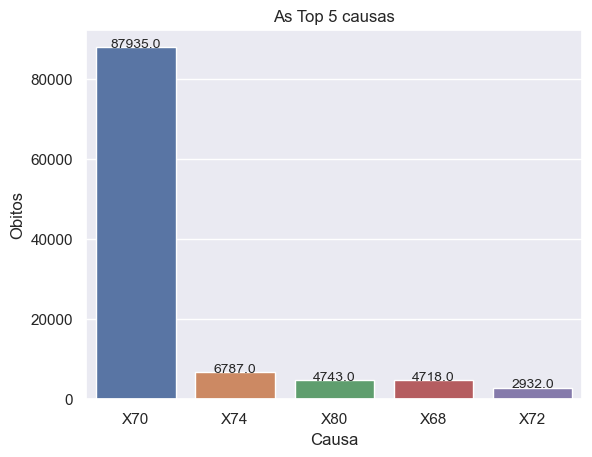

<Figure size 900x600 with 0 Axes>

In [68]:
ax = sns.barplot(x='Causa',y='Obitos',  data=df_out_top)

plt.figure(figsize=(9,6))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+.4,
            f'{round(p.get_height(),2)}',
            ha="center",
            rotation=0,
            fontsize=10)
    
ax.set_title('As Top 5 causas')


In [69]:
print(percentual_obitos_top5, '% do total de óbitos')

85.3 % do total de óbitos


Descrição das catergorias TOP 5 de causas de óbitos :
* X70: Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação;
* X74: Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada;
* X80: Lesão autoprovocada intencionalmente por precipitação de um lugar elevado;
* X68: Auto-intoxicação por e exposição, intencional, a pesticidas;
* X72: Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão.

#### O método mais utilizado foi enforcamento, estrangulamento e sufocação, seguido por disparo arma de fogo, por precipitação de um lugar elevado e por métodos de auto-intoxicação.

In [70]:
dadosgeral_final.CATEGORIACAUSA.unique()

array(['X70', 'X69', 'X74', 'X64', 'X72', 'X68', 'X80', 'X76', 'X78',
       'X61', 'X73', 'X71', 'X77', 'X65', 'X62', 'X84', 'X81', 'X79',
       'X60', 'X82', 'X83', 'X63', 'X66', 'X67', 'Y20', 'R99', 'X75',
       'Y14', 'X91', 'X99', 'V89', 'X95', 'V18', 'Y34', 'X94', 'V78',
       'V05', 'W69', 'Y21', 'Y86', 'Y83', 'Y89', 'Y87', 'I21', 'X93',
       'W18', 'J69', 'C85', 'W84', 'Y24', 'K85', 'W13', 'V02', 'R98'],
      dtype=object)

In [71]:
# Carregando arquivo com as descrições das categorias das causas
dados_categorias = pd.read_csv('dados/CID10/categorias.csv', sep=';', encoding='latin-1')
dados_categorias

,CAT,CLASSIF,DESCRICAO,DESCRABREV,REFER,EXCLUIDOS,Unnamed: 6
0,A00,NaN,Cólera,A00 Colera,NaN,NaN,NaN
1,A01,NaN,Febres tifóide e paratifóide,A01 Febres tifoide e paratifoide,NaN,NaN,NaN
2,A02,NaN,Outras infecções por Salmonella,A02 Outr infecc p/Salmonella,NaN,NaN,NaN
3,A03,NaN,Shiguelose,A03 Shiguelose,NaN,NaN,NaN
4,A04,NaN,Outras infecções intestinais bacterianas,A04 Outr infecc intestinais bacter,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2040,U80,NaN,Agente resistente à penicilina e antibióticos ...,U80 Agente resist penicilina e antibiót relac,NaN,NaN,NaN
2041,U81,NaN,Agente resistente à vancomicina e antibióticos...,U81 Agente resist vancomicina e antibiót relac,NaN,NaN,NaN
2042,U88,NaN,Agente resistente a múltiplos antibióticos,U88 Agente resistente a múltiplos antibióticos,NaN,NaN,NaN
2043,U89,NaN,Agente resistente a outros antibióticos e a an...,U89 Agente resist outr antibiót e antibiót NE,NaN,NaN,NaN


In [72]:
# Selecionando as colunas desejadas para descrição da categoria da causa do óbito
colunas_selecionadas = ['CAT','DESCRICAO']
colunas_para_excluir = [col for col in dados_categorias.columns if col not in colunas_selecionadas]
dados_categorias = dados_categorias.drop(colunas_para_excluir, axis=1)

In [73]:
dados_categorias

,CAT,DESCRICAO
0,A00,Cólera
1,A01,Febres tifóide e paratifóide
2,A02,Outras infecções por Salmonella
3,A03,Shiguelose
4,A04,Outras infecções intestinais bacterianas
...,...,...
2040,U80,Agente resistente à penicilina e antibióticos ...
2041,U81,Agente resistente à vancomicina e antibióticos...
2042,U88,Agente resistente a múltiplos antibióticos
2043,U89,Agente resistente a outros antibióticos e a an...


In [74]:
# Verifica-se que mais de 85% da categoria da causa se restringe à 5 categorias, decidi-se não sobrecarregar o dataframe com a descrição de cada causa
#dadosgeral_final['DESCRICAOCAT'] = dadosgeral_final['CATEGORIACAUSA'].map(dados_categorias.set_index('CAT')['DESCRICAO'])
#dadosgeral_final['DESCRICAOCAT'] = dadosgeral_final['DESCRICAOCAT'].str.slice(0,50)
#dadosgeral_final.head()

In [75]:
# Convertendo as variáveis categóricas para o tipo String
dadosgeral_final['RACACOR'] = dadosgeral_final['RACACOR'].astype(str)
dadosgeral_final['ORIGEM'] = dadosgeral_final['ORIGEM'].astype(str)
dadosgeral_final['ESTCIV'] = dadosgeral_final['ESTCIV'].astype(str)
dadosgeral_final['LOCOCOR'] = dadosgeral_final['LOCOCOR'].astype(str)
dadosgeral_final['ESC'] = dadosgeral_final['ESC'].astype(str)
dadosgeral_final['ANO'] = dadosgeral_final['ANO'].astype(str)
dadosgeral_final['FONTE'] = dadosgeral_final['FONTE'].astype(str)
dadosgeral_final['FAIXAETARIA'] = dadosgeral_final['FAIXAETARIA'].astype(str)

In [76]:
# Formatando as demais colunas com informação de datas, mas que ainda estão como float
dadosgeral_final['DTATESTADO']=pd.to_datetime(pd.to_datetime(dadosgeral_final['DTATESTADO'], format='%d%m%Y', errors='coerce').dt.strftime('%d/%m/%Y'))
dadosgeral_final['DTOBITO']=pd.to_datetime(pd.to_datetime(dadosgeral_final['DTOBITO'], format='%d%m%Y', errors='coerce').dt.strftime('%d/%m/%Y'))


In [77]:
dadosgeral_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 125638
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           125634 non-null  int64         
 1   ORIGEM          125634 non-null  object        
 2   DTOBITO         124945 non-null  datetime64[ns]
 3   SEXO            125634 non-null  int64         
 4   RACACOR         125634 non-null  object        
 5   ESTCIV          125634 non-null  object        
 6   ESC             125634 non-null  object        
 7   CODMUNRES       125634 non-null  int64         
 8   LOCOCOR         125634 non-null  object        
 9   CODMUNOCOR      125634 non-null  int64         
 10  LINHAA          121471 non-null  object        
 11  CAUSABAS        125634 non-null  object        
 12  DTATESTADO      124298 non-null  datetime64[ns]
 13  FONTE           125634 non-null  object        
 14  TPPOS           86310 non-null   obj

In [78]:
# Lendo arquivo com as descrições dos Municípios e siglas dos Estados e relacionados as tabelas
dados_municipios = pd.read_csv('dados/municipios/municipios.csv', sep=';', encoding='utf-8')
dados_municipios.head()

,Municipio,Óbitos p/Residênc
0,MUNICIPIO IGNORADO - RO,188
1,110001 ALTA FLORESTA D'OESTE,1419
2,110002 ARIQUEMES,5988
3,110003 CABIXI,354
4,110004 CACOAL,5308


In [79]:
# Slice o código e criando a coluna Nome
dados_municipios['Nome']=dados_municipios['Municipio'].str.slice(7,)

In [80]:
# Removendo os registros que constam apenas o Estado
dados_municipios=dados_municipios.query('Municipio.str.contains("MUNICI") == False')
dados_municipios.head()

,Municipio,Óbitos p/Residênc,Nome
1,110001 ALTA FLORESTA D'OESTE,1419,ALTA FLORESTA D'OESTE
2,110002 ARIQUEMES,5988,ARIQUEMES
3,110003 CABIXI,354,CABIXI
4,110004 CACOAL,5308,CACOAL
5,110005 CEREJEIRAS,1134,CEREJEIRAS


In [81]:
# Slice o código do município (6 caracteres) e convertendo para inteiro
dados_municipios['Codigo']=pd.to_numeric(dados_municipios['Municipio'].str.slice(0,7))
dados_municipios.head()

,Municipio,Óbitos p/Residênc,Nome,Codigo
1,110001 ALTA FLORESTA D'OESTE,1419,ALTA FLORESTA D'OESTE,110001
2,110002 ARIQUEMES,5988,ARIQUEMES,110002
3,110003 CABIXI,354,CABIXI,110003
4,110004 CACOAL,5308,CACOAL,110004
5,110005 CEREJEIRAS,1134,CEREJEIRAS,110005


In [82]:
# Removendo a coluna composta
dados_municipios=dados_municipios.drop(['Municipio'],axis=1)
dados_municipios.head()

,Óbitos p/Residênc,Nome,Codigo
1,1419,ALTA FLORESTA D'OESTE,110001
2,5988,ARIQUEMES,110002
3,354,CABIXI,110003
4,5308,CACOAL,110004
5,1134,CEREJEIRAS,110005


In [83]:
# Criando a coluna com o nome do Município na tabela principal
dadosgeral_final['MUNICIPIO']= dadosgeral_final['CODMUNRES'].map(dados_municipios.set_index('Codigo')['Nome'])

In [84]:
def consulta_uf(codigo):
    digitos_estado = int(str(codigo)[:2])
    if int (digitos_estado) == 11: return 'RO'
    if int (digitos_estado) == 12: return 'AC'
    if int (digitos_estado) == 13: return 'AM'
    if int (digitos_estado) == 14: return 'RR'
    if int (digitos_estado) == 15: return 'PA'
    if int (digitos_estado) == 16: return 'AP'
    if int (digitos_estado) == 17: return 'TO'
    if int (digitos_estado) == 21: return 'MA'
    if int (digitos_estado) == 22: return 'PI'
    if int (digitos_estado) == 23: return 'CE'
    if int (digitos_estado) == 24: return 'RN'
    if int (digitos_estado) == 25: return 'PB'
    if int (digitos_estado) == 26: return 'PE'
    if int (digitos_estado) == 27: return 'AL'
    if int (digitos_estado) == 28: return 'SE'
    if int (digitos_estado) == 29: return 'BA'
    if int (digitos_estado) == 31: return 'MG'
    if int (digitos_estado) == 32: return 'ES'
    if int (digitos_estado) == 33: return 'RJ'
    if int (digitos_estado) == 35: return 'SP'
    if int (digitos_estado) == 41: return 'PR'
    if int (digitos_estado) == 42: return 'SC'
    if int (digitos_estado) == 43: return 'RS'
    if int (digitos_estado) == 50: return 'MS'
    if int (digitos_estado) == 51: return 'MT'
    if int (digitos_estado) == 52: return 'GO' 
    if int (digitos_estado) == 53: return 'DF'

In [85]:
    # Criando a coluna com a sigla do UF
dadosgeral_final['UF'] = dadosgeral_final['CODMUNRES'].apply(consulta_uf)
dadosgeral_final.head()

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,nan,nan,120030,5.0,120030,T71X,X709,2011-08-02,9.0,NaN,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,NaN,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
2,2,1,2011-06-18,1,nan,9.0,9.0,120042,3.0,120042,T71X,X702,2011-06-18,3.0,NaN,2011,31,20-39,X70,RODRIGUES ALVES,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC


In [86]:
# Tratando valores nulos dos Municípios de ocorrência
dadosgeral_final.sort_values(by='UF')

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,nan,nan,120030,5.0,120030,T71X,X709,2011-08-02,9.0,NaN,2011,18,15-19,X70,FEIJO,AC
92121,92121,1,2019-11-18,1,4.0,9.0,4.0,120040,3.0,120040,T71X,X700,2019-11-18,3.0,N,2019,39,20-39,X70,RIO BRANCO,AC
91701,91701,1,2019-11-24,1,4.0,2.0,4.0,120040,5.0,120001,T71X,X700,2019-11-25,3.0,N,2019,35,20-39,X70,RIO BRANCO,AC
91692,91692,1,2019-03-27,1,4.0,1.0,3.0,120040,3.0,120040,T71X,X700,2019-03-27,3.0,N,2019,20,20-39,X70,RIO BRANCO,AC
91516,91516,1,2019-04-29,1,4.0,2.0,9.0,120050,3.0,120050,X740,X740,2019-04-30,2.0,NaN,2019,29,20-39,X74,SENA MADUREIRA,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49915,49915,1,2015-01-16,1,4.0,3.0,1.0,170070,5.0,170070,T71X,X709,2015-01-17,1.0,NaN,2015,63,60+,X70,ALVORADA,TO
49916,49916,1,2015-06-20,1,4.0,1.0,3.0,170310,4.0,170310,T71X,X700,2015-06-21,1.0,N,2015,25,20-39,X70,BARROLANDIA,TO
49917,49917,1,2015-04-14,1,4.0,1.0,4.0,171780,4.0,170560,S272,X744,2015-04-14,1.0,NaN,2015,24,20-39,X74,PONTE ALTA DO BOM JESUS,TO
49904,49904,1,2015-02-19,2,1.0,1.0,3.0,170210,3.0,170210,X840,X840,2015-02-19,4.0,NaN,2015,42,40-59,X84,ARAGUAINA,TO


In [87]:
dadosgeral_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 125638
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           125634 non-null  int64         
 1   ORIGEM          125634 non-null  object        
 2   DTOBITO         124945 non-null  datetime64[ns]
 3   SEXO            125634 non-null  int64         
 4   RACACOR         125634 non-null  object        
 5   ESTCIV          125634 non-null  object        
 6   ESC             125634 non-null  object        
 7   CODMUNRES       125634 non-null  int64         
 8   LOCOCOR         125634 non-null  object        
 9   CODMUNOCOR      125634 non-null  int64         
 10  LINHAA          121471 non-null  object        
 11  CAUSABAS        125634 non-null  object        
 12  DTATESTADO      124298 non-null  datetime64[ns]
 13  FONTE           125634 non-null  object        
 14  TPPOS           86310 non-null   obj

In [88]:
dadosgeral_final.head()

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,nan,nan,120030,5.0,120030,T71X,X709,2011-08-02,9.0,NaN,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,NaN,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
2,2,1,2011-06-18,1,nan,9.0,9.0,120042,3.0,120042,T71X,X702,2011-06-18,3.0,NaN,2011,31,20-39,X70,RODRIGUES ALVES,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC


In [89]:
# Fazendo uma cópia do df original
df = dadosgeral_final.copy()
grupo_local = df.groupby('TPPOS')
grupo_local['TPPOS'].count()

TPPOS
N    47914
S    38396
Name: TPPOS, dtype: int64

In [90]:
# Definindo uma variável target que será usada para estudo de óbitos investigados com correlação com as demais variáveis
# Copia do Dataframe principal para avaliar a tendência desconsiderando os registros nulos sem excluir os registro com TPOS nulos
df = df.query('TPPOS == "N" or TPPOS == "S"')
df.shape

(86310, 21)

In [91]:
dadosgeral_final['TPPOS'].unique()

array([nan, 'N', 'S'], dtype=object)

In [92]:
df['TARGET']= np.where(df['TPPOS'] == 'S', 1,0)
df['TARGET'].dtype

dtype('int32')

In [93]:
df.head()

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF,TARGET
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC,0
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC,0
5,5,1,2011-02-13,1,1.0,3.0,9.0,120040,1.0,120040,S099,X749,2011-02-13,nan,N,2011,39,20-39,X74,RIO BRANCO,AC,0
6,6,1,2011-02-13,1,4.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-02-13,nan,N,2011,24,20-39,X70,RIO BRANCO,AC,0
7,7,1,2011-01-30,1,nan,9.0,9.0,120040,3.0,120040,X700,X700,2011-01-31,1.0,N,2011,30,20-39,X70,RIO BRANCO,AC,0


In [94]:
# Recursos categóricos nominais para WOE e IV para avaliar a correção dos dados categóricos

# interpretando o Information Value, Poder de Previsão:

# < 0.02, não deve ser usado para previsão
# 0.02 - 0.1, preditor fraco
# 0.1 - 0.3, preditor médio
# 0.3 - 0.5, preditor forte
# > 0.5, indica uma associação muito relevante para a análise

def correlacao_categoricos(df):
    # Loop
    for i in df.columns:
    
        df_woe_iv = (pd.crosstab(df[i], df['TARGET'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
        print(df_woe_iv,'\n------------------------------------------------------------')


In [95]:
correlacao_categoricos(df)

TARGET         0         1  woe   iv
index                               
3       0.000021  0.000000 -inf  inf
4       0.000021  0.000000 -inf  inf
5       0.000021  0.000000 -inf  inf
6       0.000021  0.000000 -inf  inf
7       0.000021  0.000000 -inf  inf
...          ...       ...  ...  ...
125633  0.000000  0.000026  inf  inf
125634  0.000021  0.000000 -inf  inf
125635  0.000021  0.000000 -inf  inf
125636  0.000021  0.000000 -inf  inf
125637  0.000021  0.000000 -inf  inf

[86310 rows x 4 columns] 
------------------------------------------------------------
TARGET         0    1       woe   iv
ORIGEM                              
1       0.999958  1.0  0.000042  inf
2       0.000042  0.0      -inf  inf 
------------------------------------------------------------
TARGET             0         1       woe        iv
DTOBITO                                           
2011-01-10  0.000294  0.000288 -0.018055  0.208029
2011-01-13  0.000105  0.000157  0.405428  0.208029
2011-01-14  0.000

TARGET                      0         1       woe   iv
MUNICIPIO                                             
ABADIA DE GOIAS      0.000042  0.000105  0.916160  inf
ABADIA DOS DOURADOS  0.000105  0.000183  0.559485  inf
ABADIANIA            0.000188  0.000000      -inf  inf
ABAETETUBA           0.000439  0.000105 -1.435215  inf
ABAIARA              0.000000  0.000157       inf  inf
...                       ...       ...       ...  ...
XIQUE-XIQUE          0.000021  0.000026  0.223013  inf
ZABELE               0.000021  0.000000      -inf  inf
ZACARIAS             0.000021  0.000000      -inf  inf
ZE DOCA              0.000042  0.000105  0.916160  inf
ZORTEA               0.000125  0.000000      -inf  inf

[4629 rows x 4 columns] 
------------------------------------------------------------
TARGET         0         1       woe        iv
UF                                            
AC      0.007680  0.002031 -1.329920  0.896552
AL      0.000313  0.007214  3.137422  0.896552
AM      0.

<Figure size 1000x1200 with 0 Axes>

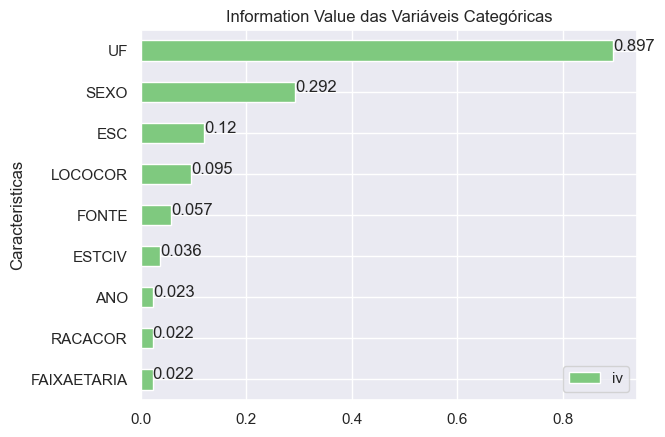

In [96]:
# Plot do Information Value

# Variáveis categóricas com IV identificado
colunas_categoricas = ['SEXO','RACACOR','ESTCIV','ESC','LOCOCOR','FONTE',
                       'ANO', 'FAIXAETARIA','UF']

# Lista para o IV
iv = []

# Loop
for i in colunas_categoricas:
    df_woe_iv = (pd.crosstab(df[i], df['TARGET'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Caracteristicas':colunas_categoricas,'iv':iv}).set_index('Caracteristicas').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

No gráfico acima, vemos a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
Com base em seu valor IV, ESC e SEXO são preditores médios, UF indica associação muito relevante para análise.  E os demais são preditores fracos.

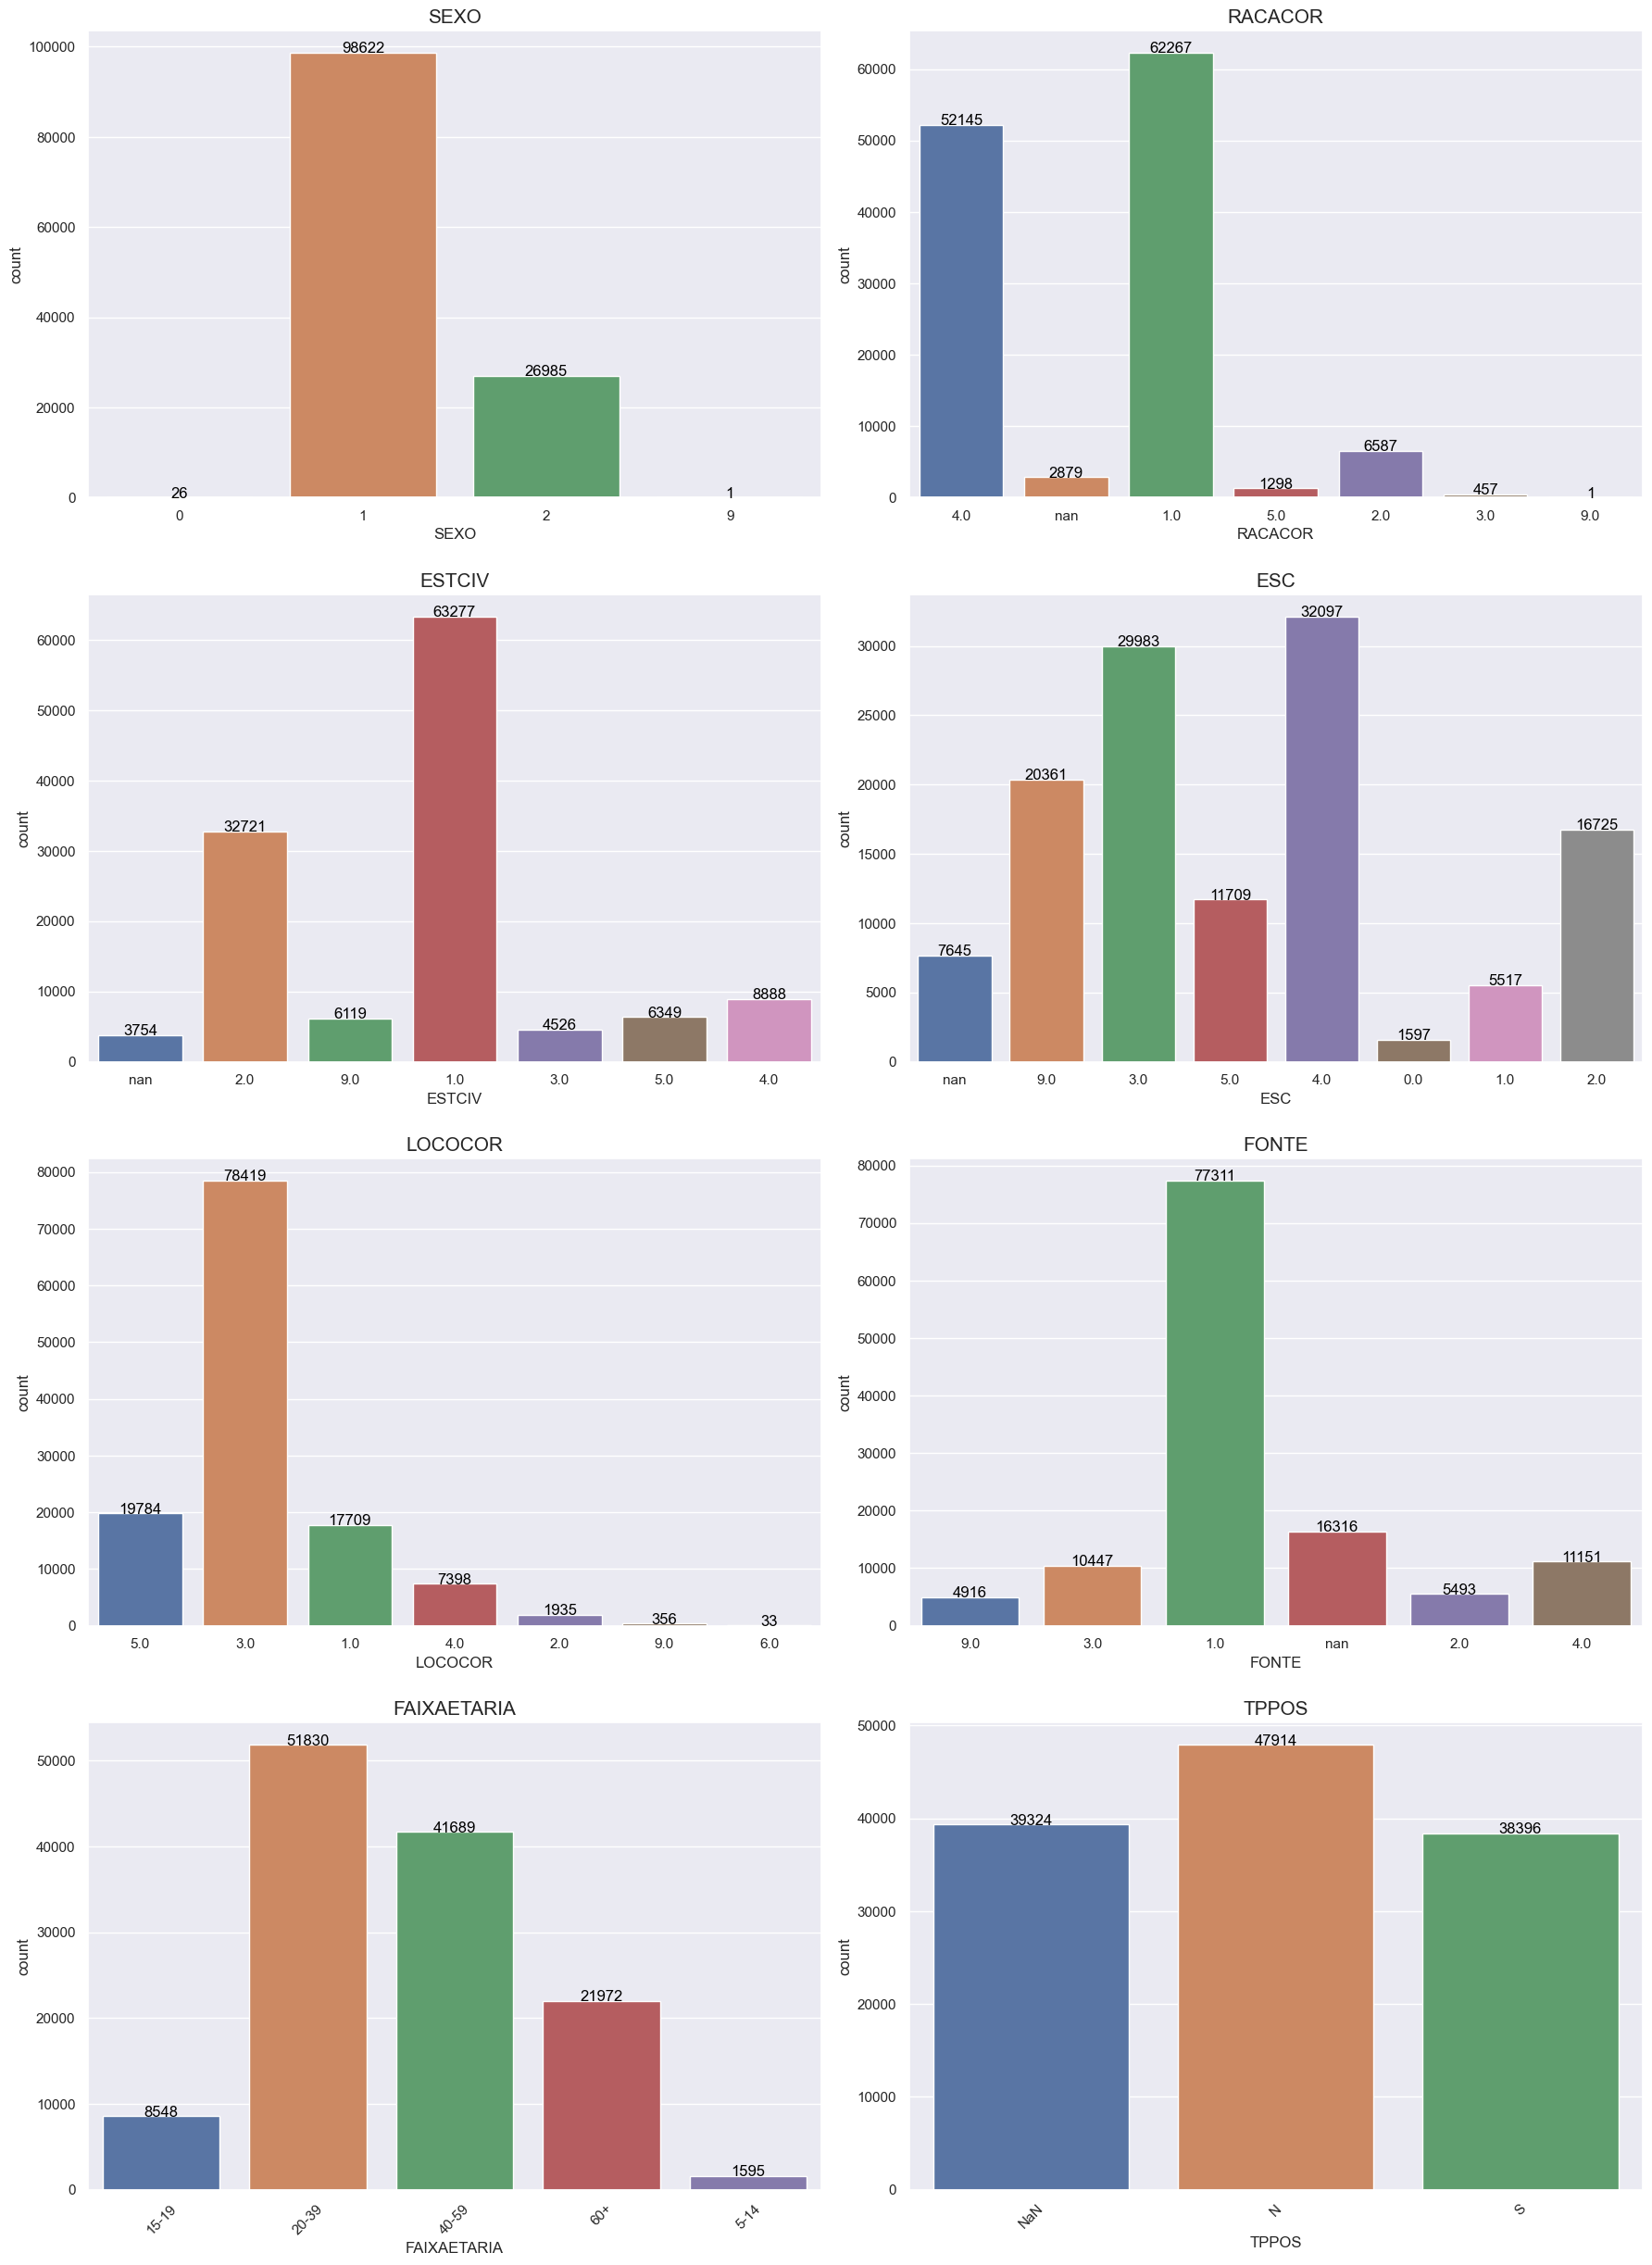

In [97]:
# Exibindo os Plots de varáveis com valores ausentes

lista_variaveis = ['SEXO','RACACOR','ESTCIV','ESC','LOCOCOR','FONTE', 'FAIXAETARIA', 'TPPOS']

# Tamanho da figura
plt.figure(figsize = (18,30))

# Contador
A = 0

for i in lista_variaveis:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = dadosgeral_final.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

In [98]:
dadosgeral_final.shape

(125634, 21)

In [99]:
dadosgeral_final['RACACOR'].unique()

array(['4.0', 'nan', '1.0', '5.0', '2.0', '3.0', '9.0'], dtype=object)

In [100]:
# A varável raça por possuir percentual de valor ausente baixo terão os registros nulos excluindo,
# e também será excluido o registro de valor único identificado como 9.0 (Ignorado)
# Evitando-se assim optar por uma estrátegia de imputação considerando a sensibilidade dos dados em razão de seus aspectos
# sociais, culturais e demográficos

# Deletando os registros nulos da coluna RACACOR
dadosgeral_final['RACACOR'] = dadosgeral_final['RACACOR'].str.replace('nan','9.0')

# Deletenado o registro com valor 9.0
registros_para_remover = dadosgeral_final[ dadosgeral_final['RACACOR'] == '9.0' ].index
dadosgeral_final.drop(registros_para_remover , inplace=True)

In [101]:
dadosgeral_final['RACACOR'].unique()

array(['4.0', '1.0', '5.0', '2.0', '3.0'], dtype=object)

In [102]:
# Excluindos os registros com informação desconhecida do SEXO , em razão da quantidade de registro ser muito baixa 
dadosgeral_final['SEXO'].unique()

array([1, 2, 0], dtype=int64)

In [103]:
registros_para_remover = dadosgeral_final[ dadosgeral_final['SEXO'] == 0 ].index
dadosgeral_final.drop(registros_para_remover , inplace=True)

In [104]:
dadosgeral_final.shape

(122744, 21)

In [105]:
dadosgeral_final['ESC'].unique()

array(['nan', '9.0', '3.0', '5.0', '4.0', '0.0', '1.0', '2.0'],
      dtype=object)

In [106]:
# Os registros ignorados de Escolaridade serão mantido em razão do alto percentual
# a fim de manter a distribuição normal dos dados
dadosgeral_final['ESC'] = dadosgeral_final['ESC'].replace('nan','9.0')
dadosgeral_final['ESC'] = dadosgeral_final['ESC'].replace('0.0','9.0')

In [107]:
dadosgeral_final['FONTE'].unique()

array(['9.0', '3.0', '1.0', 'nan', '2.0', '4.0'], dtype=object)

In [108]:
# Imputando os valores nulos com o valor 9 que segundo dicionário refere-se a valor Ignorados para a variável FONTE 
# a fim de manter a distribuição normal dos dados. Também transforma o valor 4.0 entitulado como Outros para Desconhecido
dadosgeral_final['FONTE'] = dadosgeral_final['FONTE'].replace('nan','9.0')
dadosgeral_final['FONTE'] = dadosgeral_final['FONTE'].replace('4.0','9.0')

In [109]:
# Imputando o valor 4.0 para os registros nulos e ignorado (9.0) em razão do baixo percentual de ambos da LOCOCOR  
dadosgeral_final['LOCOCOR'] = dadosgeral_final['LOCOCOR'].replace('nan','4.0')
dadosgeral_final['LOCOCOR'] = dadosgeral_final['LOCOCOR'].replace('9.0','4.0')

In [110]:
# Imputando os valores nulos com o valor mais recorrente (Solteiro) da variável que representa o Estado Civil (ESTCIV)
# Com baixo percental baixo e em razão da amostra possuir crianças
# Identificando o valor mais frequente da coluna
valor_mais_frequente = dadosgeral_final.ESTCIV.mode()[0]
dadosgeral_final['ESTCIV'] = dadosgeral_final['ESTCIV'].replace('nan',valor_mais_frequente)

In [111]:
dadosgeral_final['ESTCIV'].unique()

array(['1.0', '2.0', '3.0', '9.0', '5.0', '4.0'], dtype=object)

In [112]:
dadosgeral_final.TPPOS = dadosgeral_final.TPPOS.fillna('Z')

In [113]:
# Calcula o percentual de Investigação ou Não por UF
percentual_inv = pd.crosstab(dadosgeral_final.UF , dadosgeral_final.TPPOS , normalize = 'index') * 100
percentual_inv

TPPOS,N,S,Z
UF,,,
AC,65.549348,14.152700,20.297952
AL,1.175549,21.238245,77.586207
AM,67.844239,8.992373,23.163388
AP,6.481481,13.194444,80.324074
BA,13.485084,20.055182,66.459734
CE,8.744837,59.705513,31.549650
DF,26.322044,71.360665,2.317291
ES,51.673428,46.653144,1.673428
GO,33.654035,23.169056,43.176909


In [114]:
list(percentual_inv)

['N', 'S', 'Z']

In [115]:
lista_UF = percentual_inv[(pd.to_numeric(percentual_inv['Z']) <= 30) & (pd.to_numeric(percentual_inv['S']) <= 30)]
lista_UF

TPPOS,N,S,Z
UF,,,
AC,65.549348,14.152700,20.297952
AM,67.844239,8.992373,23.163388
MS,77.236084,15.854127,6.909789
RO,73.758865,16.400709,9.840426
RR,64.145658,17.086835,18.767507
SC,73.911193,18.286282,7.802525
SE,80.709877,17.129630,2.160494
SP,51.266017,23.724144,25.009840


In [116]:
# Unidades federativas com baixo índice de investigação do tipo de óbito analisado
UF_baixa_inv = ['AC', 'AM', 'MS', 'RO','RR','SC','SE','SP']

#### É possível constatar que dentre os estados que obtiveram pelo menos 30% da informação cadastrada sobre a investigação do óbito, os Estados do Acre, Amazonas, Mato Grosso do Sul, Rondônia, Roraima, Santa Catarina, Sergipe e São Paulo apresentaram baixo percentual de investigação, tendo investigado menos de 30 % dos óbitos.

In [117]:
dadosgeral_final.TPPOS.unique()

array(['Z', 'N', 'S'], dtype=object)

In [118]:
# Apesar coluna TPPOS (Óbito Investigado: S - Sim, N - Não)  foi mantida por possuir relevância no objetivo da análise
# Imputando os valores nulos com o valor Z - Não Informado
dadosgeral_final[dadosgeral_final['TPPOS'] == 'Z']['UF'].value_counts(dropna = False)

MG    6659
RS    5795
SP    5719
BA    3854
GO    2199
CE    1757
PI    1597
MA    1387
PA    1386
RN    1143
AL     990
PB     776
TO     721
PE     638
AM     577
SC     550
MT     550
PR     549
RJ     535
AP     347
MS     180
RO     111
AC     109
RR      67
DF      39
ES      33
SE      28
Name: UF, dtype: int64

In [119]:
# Imputando o valor N ('não investigado') para as UF que apresentam o índice de investigação abaixo de 30% dos registros informados
total_nan = 0
for uf in UF_baixa_inv:
    nan_index = (dadosgeral_final[(dadosgeral_final['TPPOS'] == 'Z') & (dadosgeral_final['UF'] == uf)]).index
    
    # Imputação de valores ausentes para a UF
    dadosgeral_final['TPPOS'][nan_index] = 'N'
    print ('Foram imputados da UF',uf,len(nan_index))
    total_nan += len(nan_index)

print ('Total de registros ausentes imputados', total_nan)
    

Foram imputados da UF AC 109
Foram imputados da UF AM 577
Foram imputados da UF MS 180
Foram imputados da UF RO 111
Foram imputados da UF RR 67
Foram imputados da UF SC 550
Foram imputados da UF SE 28
Foram imputados da UF SP 5719
Total de registros ausentes imputados 7341


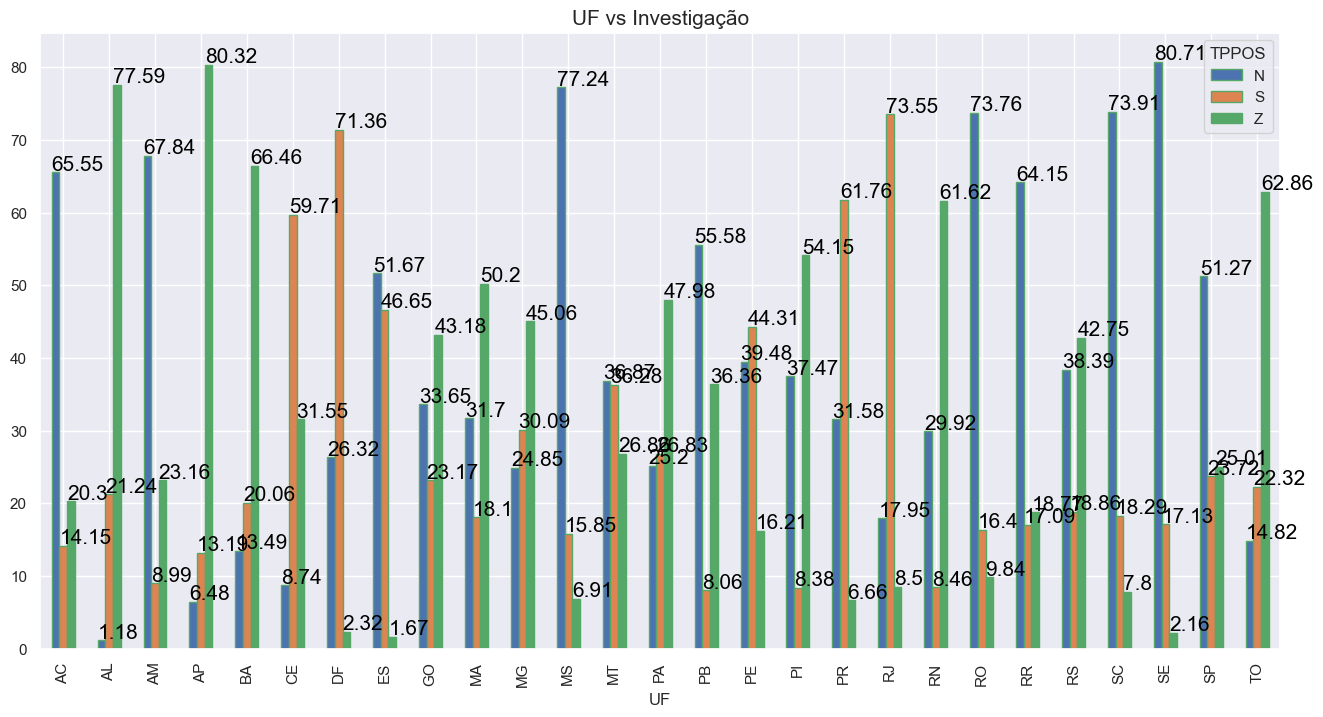

In [120]:
# Plot

# Prepara a figura a partir dos dados
fig = percentual_inv.plot(kind = 'bar', 
                          figsize = (16, 8), 
                          width = 0.5, 
                          edgecolor = 'g')

# Desenha cada grupo
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

# Título e Print
plt.title("UF vs Investigação", fontsize = 15)
plt.show()

In [121]:
lista_UF

TPPOS,N,S,Z
UF,,,
AC,65.549348,14.152700,20.297952
AM,67.844239,8.992373,23.163388
MS,77.236084,15.854127,6.909789
RO,73.758865,16.400709,9.840426
RR,64.145658,17.086835,18.767507
SC,73.911193,18.286282,7.802525
SE,80.709877,17.129630,2.160494
SP,51.266017,23.724144,25.009840


In [122]:
dadosgeral_final['TPPOS'].unique()

array(['N', 'S', 'Z'], dtype=object)

In [123]:
dadosgeral_final.head(15)

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,1.0,9.0,120030,5.0,120030,T71X,X709,2011-08-02,9.0,N,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,N,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC
5,5,1,2011-02-13,1,1.0,3.0,9.0,120040,1.0,120040,S099,X749,2011-02-13,9.0,N,2011,39,20-39,X74,RIO BRANCO,AC
6,6,1,2011-02-13,1,4.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-02-13,9.0,N,2011,24,20-39,X70,RIO BRANCO,AC
8,8,1,2011-03-22,2,4.0,1.0,9.0,120040,3.0,120040,X700,X700,2011-03-22,1.0,S,2011,30,20-39,X70,RIO BRANCO,AC
9,9,1,2011-12-20,2,4.0,1.0,3.0,120050,3.0,120050,X700,X700,2012-01-20,9.0,N,2011,25,20-39,X70,SENA MADUREIRA,AC
10,10,1,2011-03-29,1,4.0,1.0,5.0,120040,3.0,120040,X700,X700,2011-08-29,9.0,N,2011,25,20-39,X70,RIO BRANCO,AC
11,11,1,2011-09-19,1,1.0,1.0,4.0,120040,3.0,120040,T71X,X700,2011-09-19,9.0,N,2011,30,20-39,X70,RIO BRANCO,AC


In [124]:
# Tratando a variáveL categórica lINHAA, que corresponde ao diagnóstico da declaração de obito
dadosgeral_final['LINHAA'] = dadosgeral_final['LINHAA'].fillna('Desconhecido')

In [125]:
dadosgeral_final['LINHAA'].isna().sum()

0

In [126]:
display(valores_ausentes_por_coluna(dadosgeral_final))

O dataset tem 21 colunas.
Foi encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
DTATESTADO,1284,1.05,datetime64[ns]
DTOBITO,680,0.55,datetime64[ns]
MUNICIPIO,231,0.19,object


In [127]:
# Tratando os valores ausentes que restam no Dataframe, conforme apresentação acima, colunas: DTATESTADO, DTOBITO e MUNICIPIO

In [128]:
# Imputando a variável DTATESTADO (Data do atestado), utilizando o método ffill
dadosgeral_final.sort_values(by=['DTATESTADO'])
dadosgeral_final['DTATESTADO'] = dadosgeral_final['DTATESTADO'].fillna(method='ffill')

In [129]:
# Imputando a variável DTOBITO (Data do óbito), utilizando o método bfill
dadosgeral_final.sort_values(by=['DTOBITO'])
dadosgeral_final['DTOBITO']=dadosgeral_final['DTOBITO'].fillna(method='bfill')

In [130]:
dadosgeral_final.head(15)

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,1.0,9.0,120030,5.0,120030,T71X,X709,2011-08-02,9.0,N,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,N,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC
5,5,1,2011-02-13,1,1.0,3.0,9.0,120040,1.0,120040,S099,X749,2011-02-13,9.0,N,2011,39,20-39,X74,RIO BRANCO,AC
6,6,1,2011-02-13,1,4.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-02-13,9.0,N,2011,24,20-39,X70,RIO BRANCO,AC
8,8,1,2011-03-22,2,4.0,1.0,9.0,120040,3.0,120040,X700,X700,2011-03-22,1.0,S,2011,30,20-39,X70,RIO BRANCO,AC
9,9,1,2011-12-20,2,4.0,1.0,3.0,120050,3.0,120050,X700,X700,2012-01-20,9.0,N,2011,25,20-39,X70,SENA MADUREIRA,AC
10,10,1,2011-03-29,1,4.0,1.0,5.0,120040,3.0,120040,X700,X700,2011-08-29,9.0,N,2011,25,20-39,X70,RIO BRANCO,AC
11,11,1,2011-09-19,1,1.0,1.0,4.0,120040,3.0,120040,T71X,X700,2011-09-19,9.0,N,2011,30,20-39,X70,RIO BRANCO,AC


In [131]:
# Função para identificar a capital dos Estados que possuem valores ausentes
def capital_uf(uf):
    return {        
        'AC': 'Rio Branco',
        'AL': 'Maceió',
        'AP': 'Macapá',
        'AM': 'Manaus',
        'BA': 'Salvador',
        'CE': 'Fortaleza',
        'DF': 'Brasília',
        'ES': 'Vitória',
        'GO': 'Goiânia',
        'MA': 'São Luís',
        'MT': 'Cuiabá',
        'MS': 'Campo Grande',
        'MG': 'Belo Horizonte',
        'PA': 'Belém',
        'PB': 'João Pessoa',
        'PR': 'Curitiba',
        'PE': 'Recife',
        'PI': 'Teresina',
        'RJ': 'Rio de Janeiro',
        'RN': 'Natal',
        'RS': 'Porto Alegre',
        'RO': 'Porto Velho',
        'RR': 'Boa Vista',
        'SC': 'Florianópolis',
        'SP': 'São Paulo',
        'SE': 'Aracaju',
        'TO': 'Palmas'
    }.get(uf, 'Desconhecido')

In [132]:
# Imputando a variável MUNICIPIO (Município de ResidÊncia) com a capital do Estado da Residência
dadosgeral_final['MUNICIPIO'] = dadosgeral_final['MUNICIPIO'].fillna(dadosgeral_final['UF'].apply(capital_uf))
dadosgeral_final.head(20)

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,1.0,9.0,120030,5.0,120030,T71X,X709,2011-08-02,9.0,N,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,N,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC
5,5,1,2011-02-13,1,1.0,3.0,9.0,120040,1.0,120040,S099,X749,2011-02-13,9.0,N,2011,39,20-39,X74,RIO BRANCO,AC
6,6,1,2011-02-13,1,4.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-02-13,9.0,N,2011,24,20-39,X70,RIO BRANCO,AC
8,8,1,2011-03-22,2,4.0,1.0,9.0,120040,3.0,120040,X700,X700,2011-03-22,1.0,S,2011,30,20-39,X70,RIO BRANCO,AC
9,9,1,2011-12-20,2,4.0,1.0,3.0,120050,3.0,120050,X700,X700,2012-01-20,9.0,N,2011,25,20-39,X70,SENA MADUREIRA,AC
10,10,1,2011-03-29,1,4.0,1.0,5.0,120040,3.0,120040,X700,X700,2011-08-29,9.0,N,2011,25,20-39,X70,RIO BRANCO,AC
11,11,1,2011-09-19,1,1.0,1.0,4.0,120040,3.0,120040,T71X,X700,2011-09-19,9.0,N,2011,30,20-39,X70,RIO BRANCO,AC


In [133]:
# Removendo os registros duplicados, se houver
dadosgeral_final.drop_duplicates(inplace = True)
dadosgeral_final.shape

(122744, 21)

In [134]:
# Função que calcula o percentual de linhas com valores ausentes
def valores_ausentes_por_linha(df):

    # Calcula o número total de linhas com valores ausentes
    linhas_ausentes = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # Calcula o número total de linhas
    total_linhas = df.shape[0]

    # Calcula a porcentagem de linhas ausentes e retorna o print   
    return print(round(((linhas_ausentes/total_linhas) * 100), 2), "%", "das linhas no conjunto de dados contêm pelo menos um valor ausente.")

In [135]:
# Controlando o percentual de linhas com pelo menos um valor ausente
valores_ausentes_por_linha(dadosgeral_final)

0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [136]:
dadosgeral_final.shape

(122744, 21)

## 3. Engenharia de Atributos

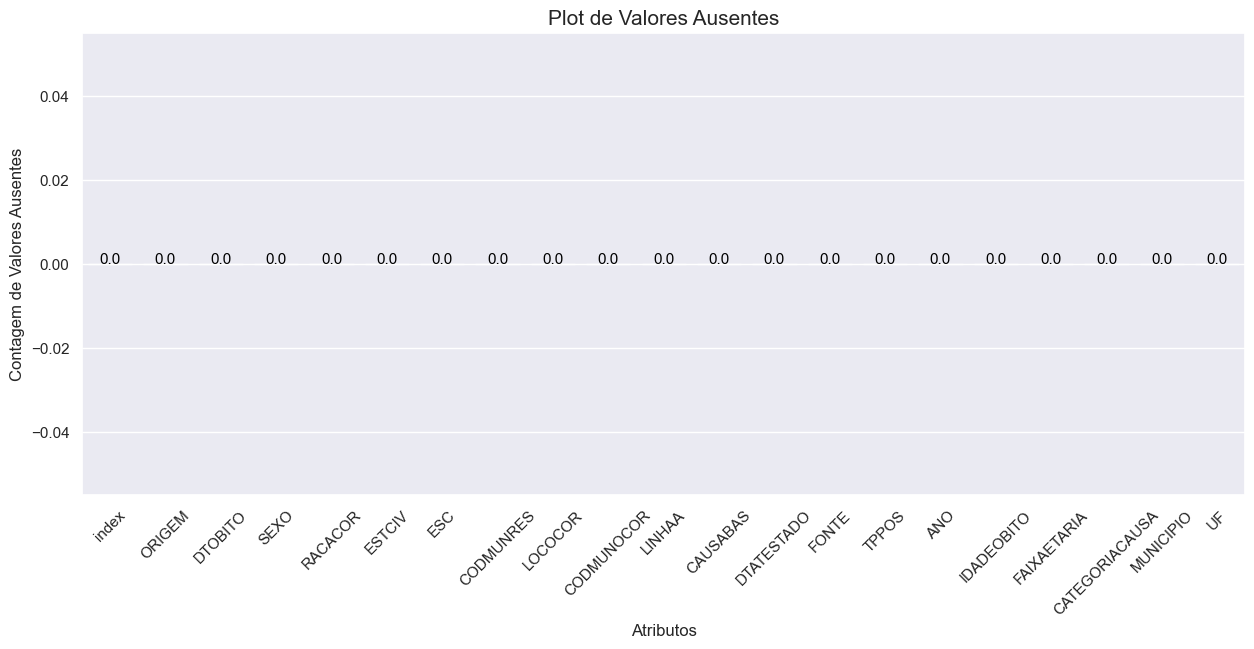

In [137]:
# Valores ausentes por coluna
null_df = dadosgeral_final.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

In [138]:
dadosgeral_final.head(15)

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF
0,0,1,2011-08-02,1,4.0,1.0,9.0,120030,5.0,120030,T71X,X709,2011-08-02,9.0,N,2011,18,15-19,X70,FEIJO,AC
1,1,1,2011-09-01,1,4.0,2.0,9.0,120020,3.0,120020,T71X,X709,2011-10-01,3.0,N,2011,38,20-39,X70,CRUZEIRO DO SUL,AC
3,3,1,2011-10-01,1,1.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-10-01,1.0,N,2011,26,20-39,X70,RIO BRANCO,AC
4,4,1,2011-04-22,1,4.0,2.0,9.0,120060,1.0,120060,T659,X690,2011-04-22,3.0,N,2011,47,40-59,X69,TARAUACA,AC
5,5,1,2011-02-13,1,1.0,3.0,9.0,120040,1.0,120040,S099,X749,2011-02-13,9.0,N,2011,39,20-39,X74,RIO BRANCO,AC
6,6,1,2011-02-13,1,4.0,1.0,3.0,120040,3.0,120040,X700,X700,2011-02-13,9.0,N,2011,24,20-39,X70,RIO BRANCO,AC
8,8,1,2011-03-22,2,4.0,1.0,9.0,120040,3.0,120040,X700,X700,2011-03-22,1.0,S,2011,30,20-39,X70,RIO BRANCO,AC
9,9,1,2011-12-20,2,4.0,1.0,3.0,120050,3.0,120050,X700,X700,2012-01-20,9.0,N,2011,25,20-39,X70,SENA MADUREIRA,AC
10,10,1,2011-03-29,1,4.0,1.0,5.0,120040,3.0,120040,X700,X700,2011-08-29,9.0,N,2011,25,20-39,X70,RIO BRANCO,AC
11,11,1,2011-09-19,1,1.0,1.0,4.0,120040,3.0,120040,T71X,X700,2011-09-19,9.0,N,2011,30,20-39,X70,RIO BRANCO,AC


In [139]:
colunas_valores_unicos(dadosgeral_final)


index:122744 valor(es) único(s).

ORIGEM:3 valor(es) único(s).
['1' '2' '3']

DTOBITO:3655 valor(es) único(s).

SEXO:2 valor(es) único(s).
[1 2]

RACACOR:5 valor(es) único(s).
['4.0' '1.0' '5.0' '2.0' '3.0']

ESTCIV:6 valor(es) único(s).
['1.0' '2.0' '3.0' '9.0' '5.0' '4.0']

ESC:6 valor(es) único(s).
['9.0' '3.0' '5.0' '4.0' '1.0' '2.0']

CODMUNRES:5435 valor(es) único(s).

LOCOCOR:6 valor(es) único(s).
['5.0' '3.0' '1.0' '4.0' '2.0' '6.0']

CODMUNOCOR:5362 valor(es) único(s).

LINHAA:2904 valor(es) único(s).

CAUSABAS:258 valor(es) único(s).

DTATESTADO:3683 valor(es) único(s).

FONTE:4 valor(es) único(s).
['9.0' '3.0' '1.0' '2.0']

TPPOS:3 valor(es) único(s).
['N' 'S' 'Z']

ANO:11 valor(es) único(s).
['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021']

IDADEOBITO:96 valor(es) único(s).

FAIXAETARIA:5 valor(es) único(s).
['15-19' '20-39' '40-59' '60+' '5-14']

CATEGORIACAUSA:53 valor(es) único(s).

MUNICIPIO:5173 valor(es) único(s).

UF:27 valor(es) único

In [140]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['ESC']= (np.where(dadosgeral_final['ESC'] == '1.0', 'Sem Escolaridade',
                          np.where(dadosgeral_final['ESC'] == '2.0',  'De 1 a 3 anos',
                          np.where(dadosgeral_final['ESC'] == '3.0',  'De 4 a 7 anos',
                          np.where(dadosgeral_final['ESC'] == '4.0',  'De 8 a 11 anos',
                          np.where(dadosgeral_final['ESC'] == '5.0',  'De 12 a Mais',
                          np.where(dadosgeral_final['ESC'] == '9.0',  'Desconhecida', dadosgeral_final['ESC'])))))))

In [141]:
dadosgeral_final.ESC.unique()

array(['Desconhecida', 'De 4 a 7 anos', 'De 12 a Mais', 'De 8 a 11 anos',
       'Sem Escolaridade', 'De 1 a 3 anos'], dtype=object)

In [142]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['SEXO']= (np.where(dadosgeral_final['SEXO'] == 1, 'Masculino',
                           np.where(dadosgeral_final['SEXO'] == 2,  'Feminino', 'Desconhecido')))

In [143]:
dadosgeral_final.SEXO.unique()

array(['Masculino', 'Feminino'], dtype=object)

In [144]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['RACACOR']= (np.where(dadosgeral_final['RACACOR'] == '1.0', 'Branca',
                              np.where(dadosgeral_final['RACACOR'] == '2.0',  'Preta',
                              np.where(dadosgeral_final['RACACOR'] == '3.0',  'Amarela',
                              np.where(dadosgeral_final['RACACOR'] == '4.0',  'Parda',
                              np.where(dadosgeral_final['RACACOR'] == '5.0',  'Indígena', 'Desconhecida'))))))

In [145]:
dadosgeral_final.RACACOR.unique()

array(['Parda', 'Branca', 'Indígena', 'Preta', 'Amarela'], dtype=object)

In [146]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['ESTCIV']= (np.where(dadosgeral_final['ESTCIV'] == '1.0', 'Solteiro',
                             np.where(dadosgeral_final['ESTCIV'] == '2.0',  'Casado',
                             np.where(dadosgeral_final['ESTCIV'] == '3.0',  'Viuvo',
                             np.where(dadosgeral_final['ESTCIV'] == '4.0',  'Divorciado',
                             np.where(dadosgeral_final['ESTCIV'] == '5.0',  'União Estável',
                             np.where(dadosgeral_final['ESTCIV'] == '9.0',  'Desconhecido', dadosgeral_final['ESTCIV'])))))))

In [147]:
dadosgeral_final.ESTCIV.unique()

array(['Solteiro', 'Casado', 'Viuvo', 'Desconhecido', 'União Estável',
       'Divorciado'], dtype=object)

In [148]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['FONTE']= (np.where(dadosgeral_final['FONTE'] == '1.0', 'Ocorrência Policial',
                            np.where(dadosgeral_final['FONTE'] == '2.0', 'Hospital',
                            np.where(dadosgeral_final['FONTE'] == '3.0', 'Família', 'Desconhecida'))))

In [149]:
dadosgeral_final.FONTE.unique()

array(['Desconhecida', 'Família', 'Ocorrência Policial', 'Hospital'],
      dtype=object)

In [150]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['TPPOS']= (np.where(dadosgeral_final['TPPOS'] == 'S', 'Investigado',
                            np.where(dadosgeral_final['TPPOS'] == 'N', 'Não Investigado', 'Não Informado')))

In [151]:
dadosgeral_final.TPPOS.unique()

array(['Não Investigado', 'Investigado', 'Não Informado'], dtype=object)

In [152]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['LOCOCOR']= (np.where(dadosgeral_final['LOCOCOR'] == '1.0', 'Hospital',
                              np.where(dadosgeral_final['LOCOCOR'] == '2.0', 'Outros locais de saúde',
                              np.where(dadosgeral_final['LOCOCOR'] == '3.0', 'Domicílio',
                              np.where(dadosgeral_final['LOCOCOR'] == '4.0', 'Via Pública',
                              np.where(dadosgeral_final['LOCOCOR'] == '6.0', 'Aldeia Indígena', 'Outros'))))))

In [153]:
dadosgeral_final.LOCOCOR.unique()

array(['Outros', 'Domicílio', 'Hospital', 'Via Pública',
       'Outros locais de saúde', 'Aldeia Indígena'], dtype=object)

In [154]:
# Substituindo os códigos pelas descrições respectiva
dadosgeral_final['ORIGEM']= (np.where(dadosgeral_final['ORIGEM'] == '1', 'Oracle',
                             np.where(dadosgeral_final['ORIGEM'] == '2', 'FTP-Banco Estadual',
                             np.where(dadosgeral_final['ORIGEM'] == '3', 'Banco SEADE','Outros'))))

In [155]:
# Criando a varíavel região do país
dadosgeral_final['REGIAO'] = (np.where(dadosgeral_final['UF'].isin(['AL', 'MA', 'PI', 'CE', 'SE', 'PB', 'RN', 'PE', 'BA']),
                                       'Nordeste',
                              np.where(dadosgeral_final['UF'].isin(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO']),
                                       'Norte',
                              np.where(dadosgeral_final['UF'].isin(['MG', 'ES', 'SP', 'RJ']),
                                       'Sudeste',
                              np.where(dadosgeral_final['UF'].isin(['PR', 'SC', 'RS']),
                                       'Sul',
                              np.where(dadosgeral_final['UF'].isin(['MS', 'MT', 'GO', 'DF']), 
                                       'Centro-Oeste', 'Outra'))))))

In [156]:
dadosgeral_final['REGIAO'].unique()

array(['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'],
      dtype=object)

In [157]:
dadosgeral_final.head(10)

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF,REGIAO
0,0,Oracle,2011-08-02,Masculino,Parda,Solteiro,Desconhecida,120030,Outros,120030,T71X,X709,2011-08-02,Desconhecida,Não Investigado,2011,18,15-19,X70,FEIJO,AC,Norte
1,1,Oracle,2011-09-01,Masculino,Parda,Casado,Desconhecida,120020,Domicílio,120020,T71X,X709,2011-10-01,Família,Não Investigado,2011,38,20-39,X70,CRUZEIRO DO SUL,AC,Norte
3,3,Oracle,2011-10-01,Masculino,Branca,Solteiro,De 4 a 7 anos,120040,Domicílio,120040,X700,X700,2011-10-01,Ocorrência Policial,Não Investigado,2011,26,20-39,X70,RIO BRANCO,AC,Norte
4,4,Oracle,2011-04-22,Masculino,Parda,Casado,Desconhecida,120060,Hospital,120060,T659,X690,2011-04-22,Família,Não Investigado,2011,47,40-59,X69,TARAUACA,AC,Norte
5,5,Oracle,2011-02-13,Masculino,Branca,Viuvo,Desconhecida,120040,Hospital,120040,S099,X749,2011-02-13,Desconhecida,Não Investigado,2011,39,20-39,X74,RIO BRANCO,AC,Norte
6,6,Oracle,2011-02-13,Masculino,Parda,Solteiro,De 4 a 7 anos,120040,Domicílio,120040,X700,X700,2011-02-13,Desconhecida,Não Investigado,2011,24,20-39,X70,RIO BRANCO,AC,Norte
8,8,Oracle,2011-03-22,Feminino,Parda,Solteiro,Desconhecida,120040,Domicílio,120040,X700,X700,2011-03-22,Ocorrência Policial,Investigado,2011,30,20-39,X70,RIO BRANCO,AC,Norte
9,9,Oracle,2011-12-20,Feminino,Parda,Solteiro,De 4 a 7 anos,120050,Domicílio,120050,X700,X700,2012-01-20,Desconhecida,Não Investigado,2011,25,20-39,X70,SENA MADUREIRA,AC,Norte
10,10,Oracle,2011-03-29,Masculino,Parda,Solteiro,De 12 a Mais,120040,Domicílio,120040,X700,X700,2011-08-29,Desconhecida,Não Investigado,2011,25,20-39,X70,RIO BRANCO,AC,Norte
11,11,Oracle,2011-09-19,Masculino,Branca,Solteiro,De 8 a 11 anos,120040,Domicílio,120040,T71X,X700,2011-09-19,Desconhecida,Não Investigado,2011,30,20-39,X70,RIO BRANCO,AC,Norte


## 4. Visualização dos Dados

In [158]:
dfviz = dadosgeral_final.copy()

In [159]:
dfviz_anual = dfviz.groupby(['ANO'], as_index=False)['index'].count()
dfviz_anual.columns=['ANO', 'CONTADOR']
dfviz_anual

,ANO,CONTADOR
0,2011,8926
1,2012,9419
2,2013,9706
3,2014,9892
4,2015,10240
5,2016,10436
6,2017,11658
7,2018,12085
8,2019,12842
9,2020,13026


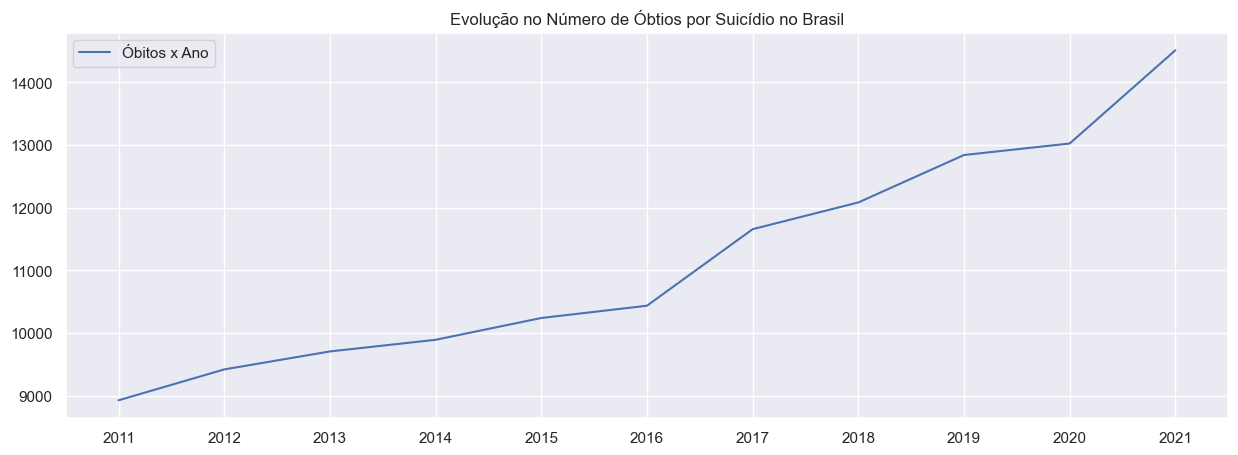

In [160]:
# Visualizando o número de óbitos nas Grandes Regiões do Brasil ao longo dos anos de 2011 a 2021
plt.figure(figsize = (15,5))
plt.plot(dfviz_anual['ANO'], dfviz_anual['CONTADOR'], label = 'Óbitos x Ano' )
plt.title('Evolução no Número de Óbtios por Suicídio no Brasil')
plt.xlabel = ('Tempo (Anos)')
plt.ylabel = ('Número de Óbitos')
plt.legend()

#### Identifica-se no Brasil um aumento crescente no número de suicídios ao longo dos anos analisados, de 2011 a 2021. 

In [161]:
# Recarregando o Biblioteca plt para resolver o erro da string (title e labels)
from importlib import reload
plt=reload(plt)

In [162]:
dfviz_ano = dadosgeral_final.groupby(['ANO'], as_index = False)['index'].count()
dfviz_ano.columns=['ANO','CONTADOR']
dfviz_ano

,ANO,CONTADOR
0,2011,8926
1,2012,9419
2,2013,9706
3,2014,9892
4,2015,10240
5,2016,10436
6,2017,11658
7,2018,12085
8,2019,12842
9,2020,13026


Text(0, 0.5, 'Número de Óbitos')

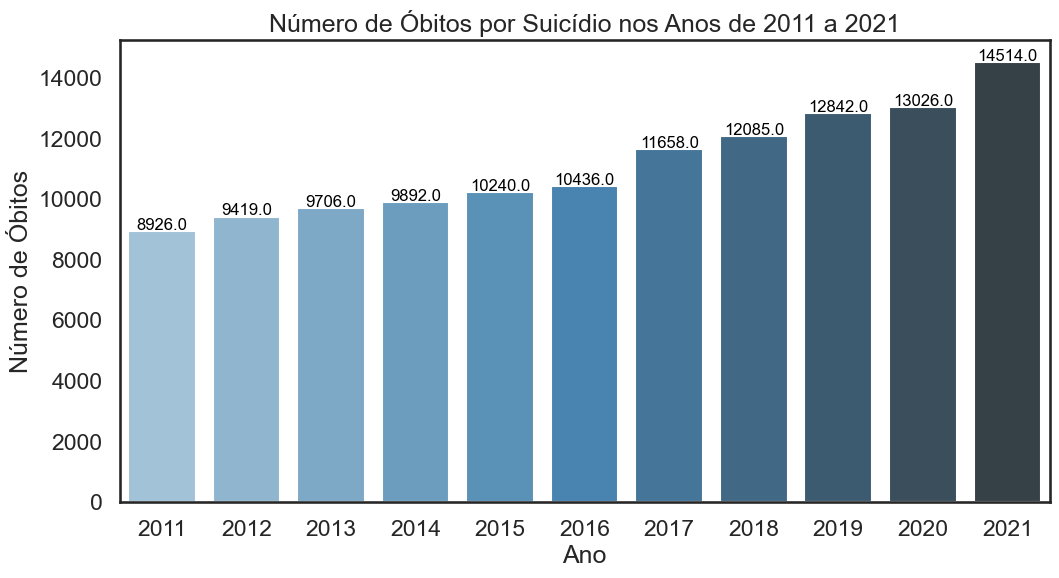

In [164]:
# Background
sns.set(style = "white", context = "talk")

# Criando o gráfico
plt.figure(figsize = (12,6))

plot = sns.barplot(x = 'ANO', 
                   y = 'CONTADOR', 
                   palette = "Blues_d",
                   data = dfviz_ano)

for i in plot.patches:
    plot.annotate(i.get_height(),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='baseline',
                   color='black', size=12, xytext=(0, 1),
                   textcoords='offset points')
    
plt.title('Número de Óbitos por Suicídio nos Anos de 2011 a 2021')
plt.xlabel ('Ano')
plt.ylabel ('Número de Óbitos')

#### Dentre os dados coletados do DATASUS, no ano de 2011, o número de óbitos correspondeu a 8.926 vidas interrompidas pelo suicídio, já em 2021, último ano analisado este número correspondeu a 14.514 óbitos, representando assim um crescimento de 62.6%. Considerando que a Brasil apresentou um crescimento populacional de apenas 7.6%, quando em 2011 o país apresentava uma população de 198,2 milhões de habitantes, e, tendo em 2021, o registro de 213,3 milhões de pessoas, segundo dados do IBGE.

In [165]:
# Criando um gráfico para análise do crescimento pelas Grandes Regiões Brasileiras
dfviz_norte=dadosgeral_final[dadosgeral_final['REGIAO'] == 'Norte'].groupby(['ANO'], as_index=False)['index'].count()
dfviz_norte.columns = ['ANO', 'CONTADOR']
dfviz_norte

,ANO,CONTADOR
0,2011,587
1,2012,594
2,2013,664
3,2014,633
4,2015,805
5,2016,756
6,2017,836
7,2018,931
8,2019,989
9,2020,1061


In [166]:
dfviz_nordeste=dadosgeral_final[dadosgeral_final['REGIAO'] == 'Nordeste'].groupby(['ANO'], as_index=False)['index'].count()
dfviz_nordeste.columns = ['ANO', 'CONTADOR']
dfviz_nordeste

,ANO,CONTADOR
0,2011,1945
1,2012,1964
2,2013,2097
3,2014,2049
4,2015,2183
5,2016,2364
6,2017,2773
7,2018,2763
8,2019,2864
9,2020,3018


In [167]:
dfviz_sul=dadosgeral_final[dadosgeral_final['REGIAO'] == 'Sul'].groupby(['ANO'], as_index=False)['index'].count()
dfviz_sul.columns = ['ANO', 'CONTADOR']
dfviz_sul

,ANO,CONTADOR
0,2011,2076
1,2012,2288
2,2013,2293
3,2014,2248
4,2015,2435
5,2016,2519
6,2017,2756
7,2018,2796
8,2019,3081
9,2020,3035


In [168]:
dfviz_sudeste=dadosgeral_final[dadosgeral_final['REGIAO'] == 'Sudeste'].groupby(['ANO'], as_index=False)['index'].count()
dfviz_sudeste.columns = ['ANO', 'CONTADOR']
dfviz_sudeste

,ANO,CONTADOR
0,2011,3556
1,2012,3687
2,2013,3736
3,2014,4039
4,2015,3912
5,2016,3796
6,2017,4204
7,2018,4444
8,2019,4670
9,2020,4703


In [169]:
dfviz_centrooeste=dadosgeral_final[dadosgeral_final['REGIAO'] == 'Centro-Oeste'].groupby(['ANO'], as_index=False)['index'].count()
dfviz_centrooeste.columns = ['ANO', 'CONTADOR']
dfviz_centrooeste

,ANO,CONTADOR
0,2011,762
1,2012,886
2,2013,916
3,2014,923
4,2015,905
5,2016,1001
6,2017,1089
7,2018,1151
8,2019,1238
9,2020,1209


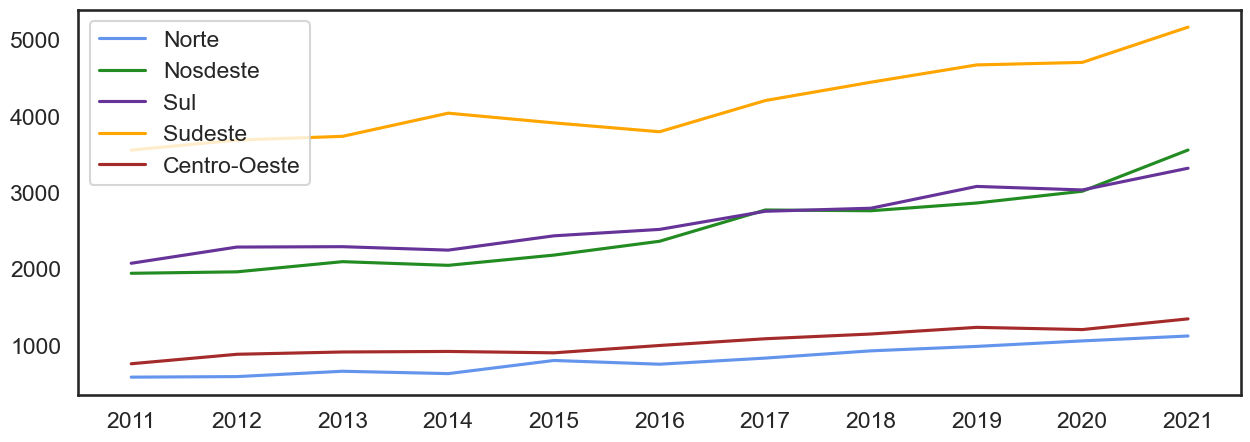

In [170]:
# Visualizando o número de óbitos nas Grandes Regiões do Brasil ao longo dos anos de 2011 a 2021
plt.figure(figsize = (15,5))
plt.plot(dfviz_norte['ANO'], dfviz_norte['CONTADOR'], label = 'Norte', color = 'cornflowerblue' )
plt.plot(dfviz_nordeste['ANO'], dfviz_nordeste['CONTADOR'], label = 'Nosdeste', color = 'forestgreen' )
plt.plot(dfviz_sul['ANO'], dfviz_sul['CONTADOR'], label = 'Sul', color = 'rebeccapurple')
plt.plot(dfviz_sudeste['ANO'], dfviz_sudeste['CONTADOR'], label = 'Sudeste', color = 'orange' )
plt.plot(dfviz_centrooeste['ANO'], dfviz_centrooeste['CONTADOR'], label = 'Centro-Oeste', color = 'brown' )
#plt.title('Evolução no Número de Óbtios nas Grandes Regiões do Brasil')
#plt.xlabel ('Evolução de óbitos por Ano')
#plt.ylabel ('Região do Brasil')
plt.legend()

#### O aumento da taxa de suicídios apresentam algumas particularidades entre as diferentes regiões e estados brasileiros.

In [171]:
dfviz_estado_civil = dfviz[dfviz['IDADEOBITO'] >= 18].groupby(['ESTCIV'], as_index=False)['index'].count()
dfviz_estado_civil.columns=['ESTCIV','CONTADOR']
dfviz_estado_civil

,ESTCIV,CONTADOR
0,Casado,32172
1,Desconhecido,5750
2,Divorciado,8754
3,Solteiro,59675
4,União Estável,6218
5,Viuvo,4442


In [172]:
dfviz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122744 entries, 0 to 125638
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           122744 non-null  int64         
 1   ORIGEM          122744 non-null  object        
 2   DTOBITO         122744 non-null  datetime64[ns]
 3   SEXO            122744 non-null  object        
 4   RACACOR         122744 non-null  object        
 5   ESTCIV          122744 non-null  object        
 6   ESC             122744 non-null  object        
 7   CODMUNRES       122744 non-null  int64         
 8   LOCOCOR         122744 non-null  object        
 9   CODMUNOCOR      122744 non-null  int64         
 10  LINHAA          122744 non-null  object        
 11  CAUSABAS        122744 non-null  object        
 12  DTATESTADO      122744 non-null  datetime64[ns]
 13  FONTE           122744 non-null  object        
 14  TPPOS           122744 non-null  obj

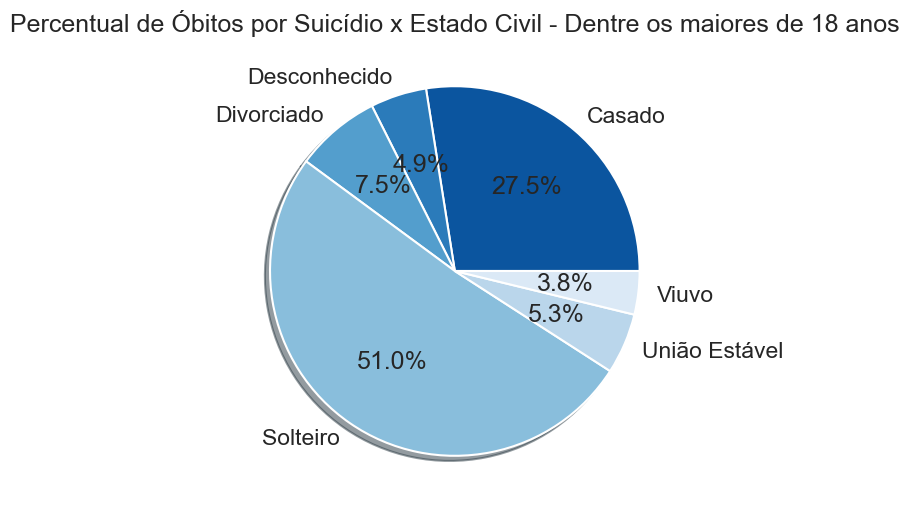

In [180]:
sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(dfviz_estado_civil['CONTADOR'], 
        labels = dfviz_estado_civil.ESTCIV, 
        shadow = True, 
        autopct = '%1.1f%%')
plt.title('Percentual de Óbitos por Suicídio x Estado Civil - Dentre os maiores de 18 anos')
plt.show()

#### No Brasil, no período de 2011 a 2021, dentre os maiores de 18 anos, 51% dos óbitos por suicídio foram de pessoas solteiras, 27.5% estavam casadas, 7.5% divorciadas, 5.3% em União Estável, 3.8% de pessoas viúvas  e outros 4.9% com estado civil desconhecido.

In [181]:
dfviz_solteiro = dfviz.query('IDADEOBITO > 18 and ESTCIV == "Solteiro"').groupby(['FAIXAETARIA'], as_index=False)['index'].count()
dfviz_solteiro.columns=['FAIXAETARIA','CONTADOR']
dfviz_solteiro

,FAIXAETARIA,CONTADOR
0,15-19,2018
1,20-39,36311
2,40-59,15582
3,60+,3908


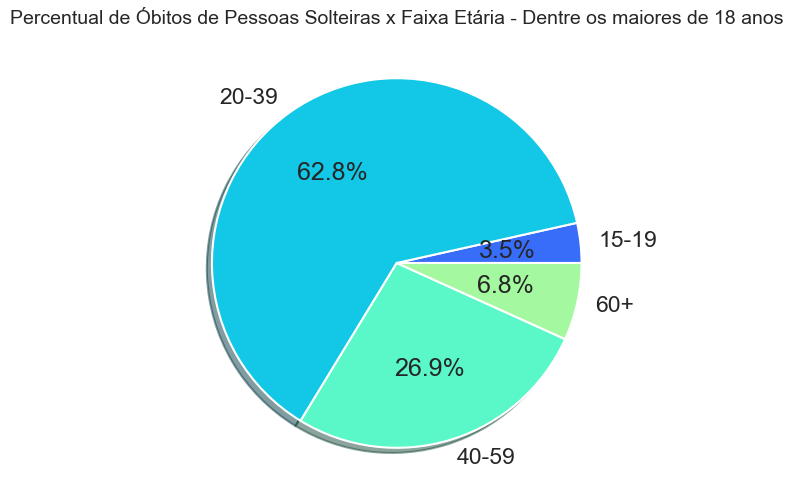

In [182]:
sns.set_palette('rainbow')
plt.figure(figsize = (6, 6))
plt.pie(dfviz_solteiro['CONTADOR'], 
        labels = dfviz_solteiro.FAIXAETARIA, 
        shadow = True, 
        autopct = '%1.1f%%')
plt.title('Percentual de Óbitos de Pessoas Solteiras x Faixa Etária - Dentre os maiores de 18 anos', fontsize=14)
plt.show()

#### No período de 2011 a 2021, dentre os maiores de 18 anos, 62.8% dos óbitos foram de indivíduos com idades entre 20 e 39 anos, 26.9% com idades entre 40 e 59 anos, 6.8% com 60 anos ou mais e 3.5% com idade entre 18 e 19 anos.

In [183]:
dfviz_mes = dadosgeral_final.copy()

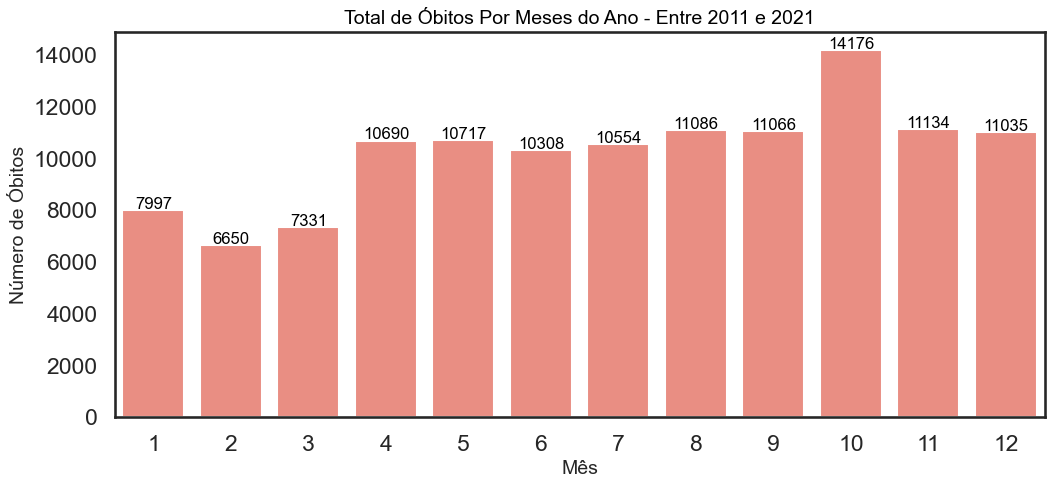

In [184]:
# Mostra o gráfico
#plt.show()
plt.figure(figsize = (12, 5))

plot = sns.countplot(x = dfviz_mes['DTOBITO'].dt.month.astype(int), color='salmon')

# Coloca os totais em cada uma das barras como labels
for i in plot.patches:
    plot.annotate(i.get_height(),
                   (i.get_x() + i.get_width() / 2,
                    i.get_height()), ha='center', va='baseline',
                   color='black', size=12, xytext=(0, 1),
                   textcoords='offset points')
    
plt.title("Total de Óbitos Por Meses do Ano - Entre 2011 e 2021", fontsize = 14, color = 'black')
plt.xlabel('Mês', fontsize = 14)
plt.ylabel('Número de Óbitos', fontsize = 14)
plt.show()

#### Dentre os anos analisados, foi observado que o mês de Outubro(10) apresenta um aumento crescente no número de óbitos.

In [185]:
# Criando a coluna MÊS de modo a criar outras análise com referência ao mês do óbito
dfviz_ano_mes = dadosgeral_final.copy()
dfviz_ano_mes['MES'] = dfviz_ano_mes['DTOBITO'].dt.month
dfviz_ano_mes

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF,REGIAO,MES
0,0,Oracle,2011-08-02,Masculino,Parda,Solteiro,Desconhecida,120030,Outros,120030,T71X,X709,2011-08-02,Desconhecida,Não Investigado,2011,18,15-19,X70,FEIJO,AC,Norte,8
1,1,Oracle,2011-09-01,Masculino,Parda,Casado,Desconhecida,120020,Domicílio,120020,T71X,X709,2011-10-01,Família,Não Investigado,2011,38,20-39,X70,CRUZEIRO DO SUL,AC,Norte,9
3,3,Oracle,2011-10-01,Masculino,Branca,Solteiro,De 4 a 7 anos,120040,Domicílio,120040,X700,X700,2011-10-01,Ocorrência Policial,Não Investigado,2011,26,20-39,X70,RIO BRANCO,AC,Norte,10
4,4,Oracle,2011-04-22,Masculino,Parda,Casado,Desconhecida,120060,Hospital,120060,T659,X690,2011-04-22,Família,Não Investigado,2011,47,40-59,X69,TARAUACA,AC,Norte,4
5,5,Oracle,2011-02-13,Masculino,Branca,Viuvo,Desconhecida,120040,Hospital,120040,S099,X749,2011-02-13,Desconhecida,Não Investigado,2011,39,20-39,X74,RIO BRANCO,AC,Norte,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125634,125634,Oracle,2021-08-12,Masculino,Parda,União Estável,De 4 a 7 anos,171820,Hospital,172100,S069,X729,2021-08-12,Ocorrência Policial,Não Investigado,2021,34,20-39,X72,PORTO NACIONAL,TO,Norte,8
125635,125635,Oracle,2021-11-27,Masculino,Parda,Solteiro,Desconhecida,172100,Domicílio,172100,T71X,X700,2021-11-27,Ocorrência Policial,Não Investigado,2021,66,60+,X70,PALMAS,TO,Norte,11
125636,125636,Oracle,2021-11-14,Masculino,Parda,Casado,De 12 a Mais,171820,Domicílio,172100,T798,X700,2021-11-14,Ocorrência Policial,Não Investigado,2021,31,20-39,X70,PORTO NACIONAL,TO,Norte,11
125637,125637,Oracle,2021-11-14,Masculino,Parda,União Estável,De 1 a 3 anos,171330,Outros,172100,T798,X708,2021-11-15,Ocorrência Policial,Não Investigado,2021,44,40-59,X70,MIRANORTE,TO,Norte,11


In [186]:
dfviz_ano_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122744 entries, 0 to 125638
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           122744 non-null  int64         
 1   ORIGEM          122744 non-null  object        
 2   DTOBITO         122744 non-null  datetime64[ns]
 3   SEXO            122744 non-null  object        
 4   RACACOR         122744 non-null  object        
 5   ESTCIV          122744 non-null  object        
 6   ESC             122744 non-null  object        
 7   CODMUNRES       122744 non-null  int64         
 8   LOCOCOR         122744 non-null  object        
 9   CODMUNOCOR      122744 non-null  int64         
 10  LINHAA          122744 non-null  object        
 11  CAUSABAS        122744 non-null  object        
 12  DTATESTADO      122744 non-null  datetime64[ns]
 13  FONTE           122744 non-null  object        
 14  TPPOS           122744 non-null  obj

In [187]:
dfviz_anos = dfviz_ano_mes.groupby(['ANO','MES'], as_index=False)['index'].count()
dfviz_anos.columns=['ANO','MES','CONTADOR']
dfviz_anos

,ANO,MES,CONTADOR
0,2011,1,587
1,2011,2,469
2,2011,3,530
3,2011,4,840
4,2011,5,738
...,...,...,...
127,2021,8,1342
128,2021,9,1307
129,2021,10,1695
130,2021,11,1319


In [188]:
dfviz_ano_2011 = dfviz_anos[dfviz_anos['ANO'] == '2011']
dfviz_ano_2011

,ANO,MES,CONTADOR
0,2011,1,587
1,2011,2,469
2,2011,3,530
3,2011,4,840
4,2011,5,738
5,2011,6,736
6,2011,7,824
7,2011,8,798
8,2011,9,848
9,2011,10,981


In [189]:
dfviz_ano_2012 = dfviz_anos[dfviz_anos['ANO'] == '2012']
dfviz_ano_2012

,ANO,MES,CONTADOR
12,2012,1,594
13,2012,2,555
14,2012,3,525
15,2012,4,825
16,2012,5,807
17,2012,6,734
18,2012,7,841
19,2012,8,854
20,2012,9,833
21,2012,10,1077


In [190]:
dfviz_ano_2013 = dfviz_anos[dfviz_anos['ANO'] == '2013']
dfviz_ano_2013

,ANO,MES,CONTADOR
24,2013,1,639
25,2013,2,529
26,2013,3,587
27,2013,4,861
28,2013,5,882
29,2013,6,840
30,2013,7,764
31,2013,8,865
32,2013,9,870
33,2013,10,1130


In [191]:
dfviz_ano_2014 = dfviz_anos[dfviz_anos['ANO'] == '2014']
dfviz_ano_2014

,ANO,MES,CONTADOR
36,2014,1,625
37,2014,2,510
38,2014,3,578
39,2014,4,911
40,2014,5,848
41,2014,6,840
42,2014,7,814
43,2014,8,965
44,2014,9,886
45,2014,10,1151


In [192]:
dfviz_ano_2015 = dfviz_anos[dfviz_anos['ANO'] == '2015']
dfviz_ano_2015

,ANO,MES,CONTADOR
48,2015,1,664
49,2015,2,553
50,2015,3,615
51,2015,4,878
52,2015,5,876
53,2015,6,888
54,2015,7,883
55,2015,8,897
56,2015,9,896
57,2015,10,1191


In [193]:
dfviz_ano_2016 = dfviz_anos[dfviz_anos['ANO'] == '2016']
dfviz_ano_2016

,ANO,MES,CONTADOR
60,2016,1,682
61,2016,2,583
62,2016,3,615
63,2016,4,889
64,2016,5,867
65,2016,6,920
66,2016,7,928
67,2016,8,934
68,2016,9,926
69,2016,10,1199


In [194]:
dfviz_ano_2017 = dfviz_anos[dfviz_anos['ANO'] == '2017']
dfviz_ano_2017

,ANO,MES,CONTADOR
72,2017,1,728
73,2017,2,600
74,2017,3,675
75,2017,4,973
76,2017,5,1078
77,2017,6,972
78,2017,7,993
79,2017,8,1090
80,2017,9,1074
81,2017,10,1429


In [195]:
dfviz_ano_2018 = dfviz_anos[dfviz_anos['ANO'] == '2018']
dfviz_ano_2018

,ANO,MES,CONTADOR
84,2018,1,785
85,2018,2,636
86,2018,3,725
87,2018,4,1037
88,2018,5,1100
89,2018,6,1024
90,2018,7,1068
91,2018,8,1061
92,2018,9,1096
93,2018,10,1385


In [196]:
dfviz_ano_2019 = dfviz_anos[dfviz_anos['ANO'] == '2019']
dfviz_ano_2019

,ANO,MES,CONTADOR
96,2019,1,830
97,2019,2,638
98,2019,3,841
99,2019,4,1147
100,2019,5,1125
101,2019,6,1055
102,2019,7,1125
103,2019,8,1120
104,2019,9,1150
105,2019,10,1476


In [197]:
dfviz_ano_2020 = dfviz_anos[dfviz_anos['ANO'] == '2020']
dfviz_ano_2020

,ANO,MES,CONTADOR
108,2020,1,910
109,2020,2,781
110,2020,3,798
111,2020,4,1131
112,2020,5,1075
113,2020,6,1102
114,2020,7,1080
115,2020,8,1160
116,2020,9,1180
117,2020,10,1462


In [198]:
dfviz_ano_2021 = dfviz_anos[dfviz_anos['ANO'] == '2021']
dfviz_ano_2021

,ANO,MES,CONTADOR
120,2021,1,953
121,2021,2,796
122,2021,3,842
123,2021,4,1198
124,2021,5,1321
125,2021,6,1197
126,2021,7,1234
127,2021,8,1342
128,2021,9,1307
129,2021,10,1695


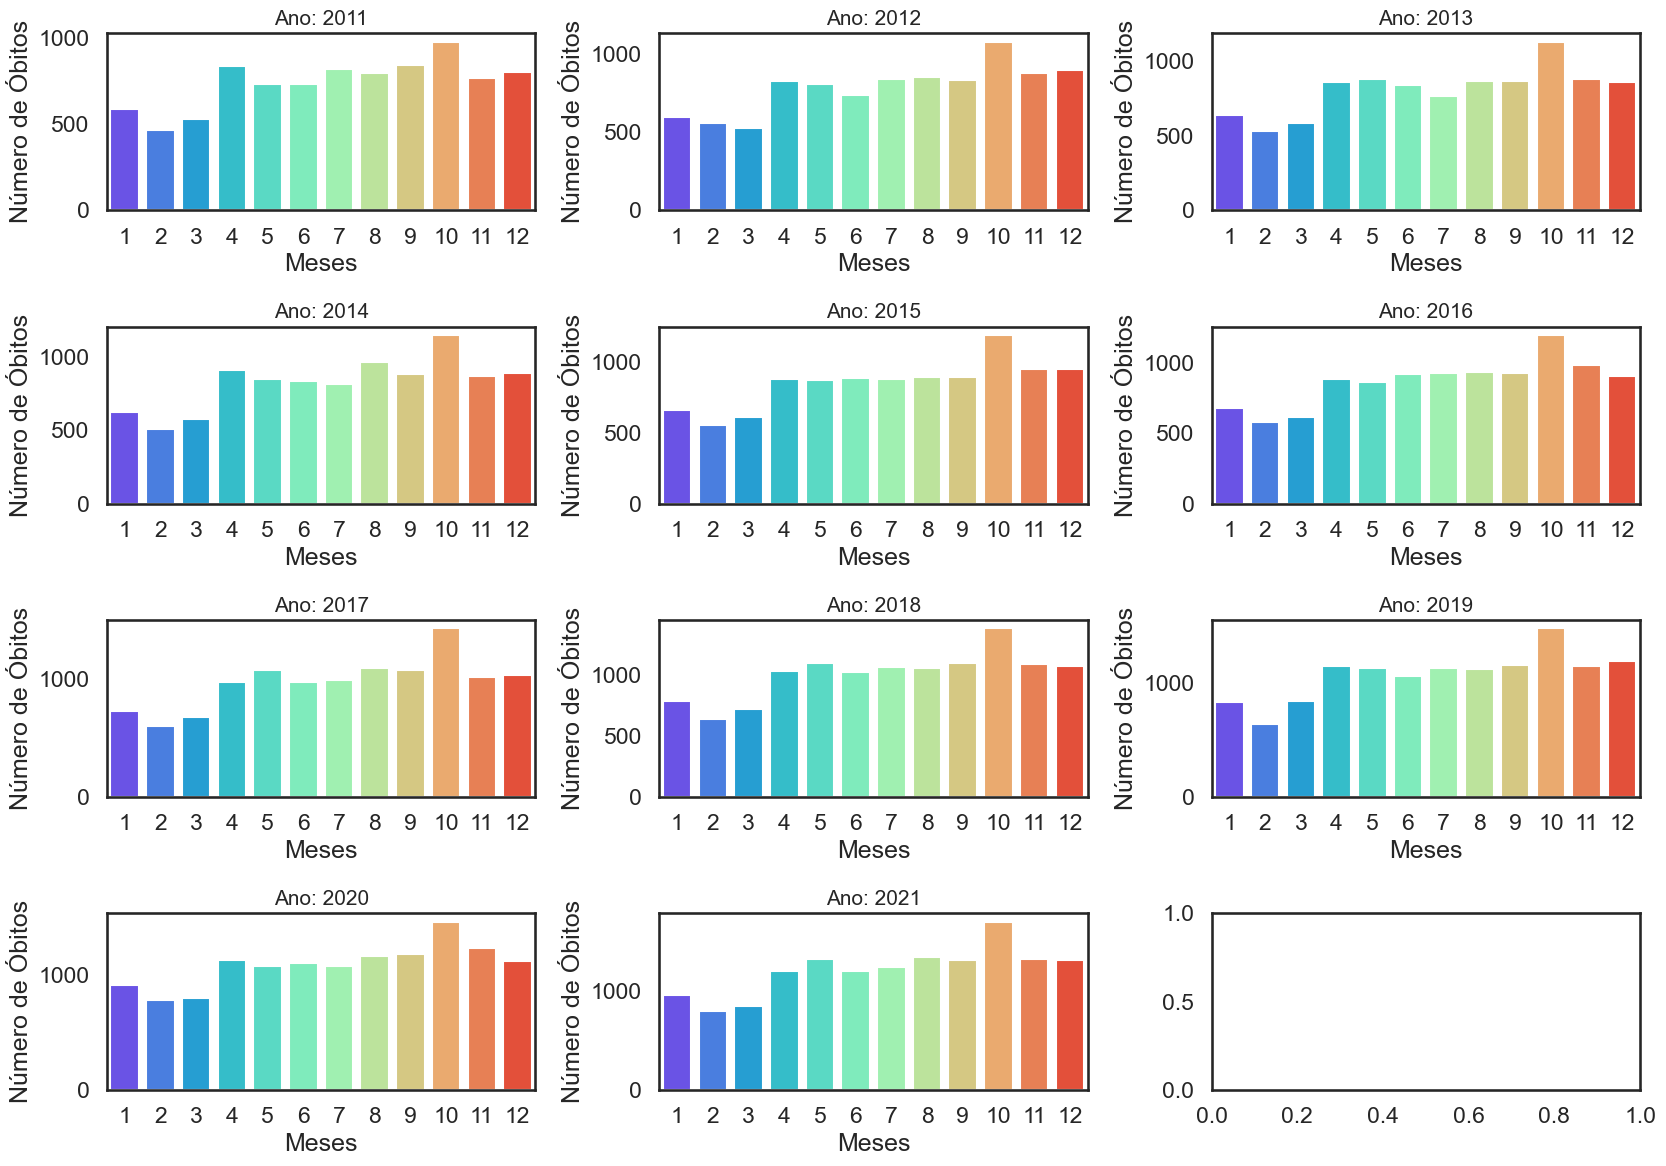

In [199]:
row, col = 4, 3

fig, ax = plt.subplots(row, col, figsize = (17,12))

plot11 = sns.barplot(dfviz_ano_2011['MES'], dfviz_ano_2011['CONTADOR'], palette = 'rainbow', ax = ax[0,0])
plot11.set_title('Ano: 2011', fontsize=15)
plot11.set_xlabel('Meses')
plot11.set_ylabel('Número de Óbitos')
          
plot12 = sns.barplot(dfviz_ano_2012['MES'], dfviz_ano_2012['CONTADOR'], palette = 'rainbow', ax = ax[0,1])
plot12.set_title('Ano: 2012', fontsize=15)
plot12.set_xlabel('Meses')
plot12.set_ylabel('Número de Óbitos')

plot13 = sns.barplot(dfviz_ano_2013['MES'], dfviz_ano_2013['CONTADOR'], palette = 'rainbow', ax = ax[0,2])
plot13.set_title('Ano: 2013', fontsize=15)
plot13.set_xlabel('Meses')
plot13.set_ylabel('Número de Óbitos')

plot14 = sns.barplot(dfviz_ano_2014['MES'], dfviz_ano_2014['CONTADOR'], palette = 'rainbow', ax = ax[1,0])
plot14.set_title('Ano: 2014', fontsize=15)
plot14.set_xlabel('Meses')
plot14.set_ylabel('Número de Óbitos')

plot15 = sns.barplot(dfviz_ano_2015['MES'], dfviz_ano_2015['CONTADOR'], palette = 'rainbow', ax = ax[1,1])
plot15.set_title('Ano: 2015', fontsize=15)
plot15.set_xlabel('Meses')
plot15.set_ylabel('Número de Óbitos')

plot16 = sns.barplot(dfviz_ano_2016['MES'], dfviz_ano_2016['CONTADOR'], palette = 'rainbow', ax = ax[1,2])
plot16.set_title('Ano: 2016', fontsize=15)
plot16.set_xlabel('Meses')
plot16.set_ylabel('Número de Óbitos')

plot17 = sns.barplot(dfviz_ano_2017['MES'], dfviz_ano_2017['CONTADOR'], palette = 'rainbow', ax = ax[2,0])
plot17.set_title('Ano: 2017', fontsize=15)
plot17.set_xlabel('Meses')
plot17.set_ylabel('Número de Óbitos')

plot18 = sns.barplot(dfviz_ano_2018['MES'], dfviz_ano_2018['CONTADOR'], palette = 'rainbow', ax = ax[2,1])
plot18.set_title('Ano: 2018', fontsize=15)
plot18.set_xlabel('Meses')
plot18.set_ylabel('Número de Óbitos')

plot19 = sns.barplot(dfviz_ano_2019['MES'], dfviz_ano_2019['CONTADOR'], palette = 'rainbow', ax = ax[2,2])
plot19.set_title('Ano: 2019', fontsize=15)
plot19.set_xlabel('Meses')
plot19.set_ylabel('Número de Óbitos')

plot20 = sns.barplot(dfviz_ano_2020['MES'], dfviz_ano_2020['CONTADOR'], palette = 'rainbow', ax = ax[3,0])
plot20.set_title('Ano: 2020', fontsize=15)
plot20.set_xlabel('Meses')
plot20.set_ylabel('Número de Óbitos')

plot21 = sns.barplot(dfviz_ano_2021['MES'], dfviz_ano_2021['CONTADOR'], palette = 'rainbow', ax = ax[3,1])
plot21.set_title('Ano: 2021', fontsize=15)
plot21.set_xlabel('Meses')
plot21.set_ylabel('Número de Óbitos')

fig.tight_layout()

#### Constatou-se que o número maior de registro no mês de outubro ocorre em todos os anos da análise.

In [200]:
# Analisando se o destaque para o mês de outubro acomete todas as faixas etárias, no decorrer dos anos
dfviz_ano_mes = dfviz_ano_mes[dfviz_ano_mes['MES'] == 10]

# Definir a ordem categórica desejada da Faixa Etária
ordem_faixa_etaria = pd.CategoricalDtype(categories=['5-14', '15-19', '20-39', '40-59', '60+'], ordered=True)
dfviz_ano_mes['FAIXAETARIA'] = dfviz_ano_mes['FAIXAETARIA'].astype(ordem_faixa_etaria)

dfviz_mes_outubro = dfviz_ano_mes.groupby(['ANO','FAIXAETARIA'], as_index=False)['index'].count()
dfviz_mes_outubro.columns=['ANO','FAIXAETARIA','CONTADOR']
dfviz_mes_outubro

,ANO,FAIXAETARIA,CONTADOR
0,2011,5-14,9
1,2011,15-19,59
2,2011,20-39,463
3,2011,40-59,320
4,2011,60+,130
5,2012,5-14,16
6,2012,15-19,64
7,2012,20-39,456
8,2012,40-59,362
9,2012,60+,179


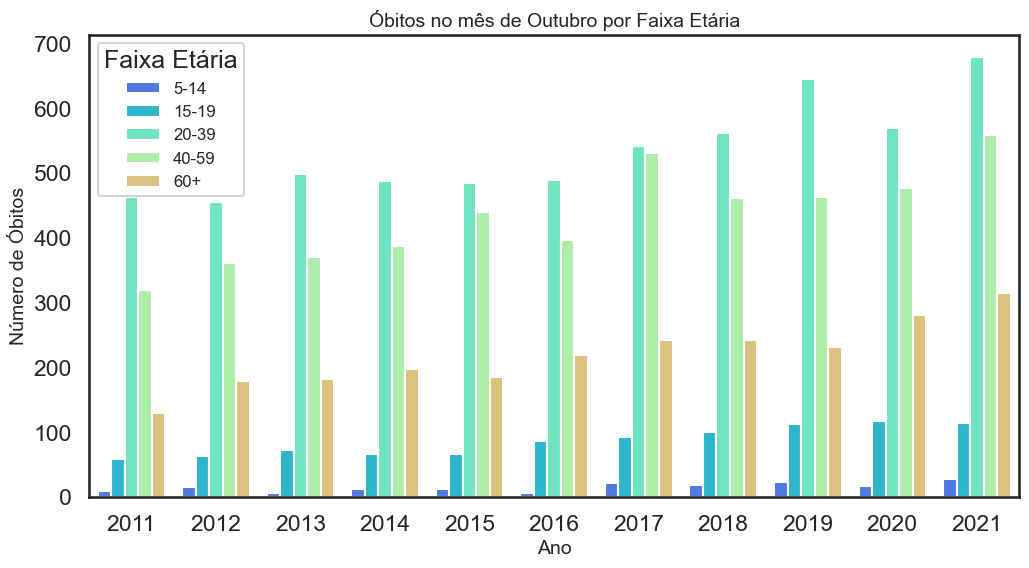

In [201]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x='ANO', y='CONTADOR', hue='FAIXAETARIA', data=dfviz_mes_outubro)
ax.set_title('Óbitos no mês de Outubro por Faixa Etária', fontsize = 14)
ax.set_xlabel('Ano', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Faixa Etária', fontsize=12)

#### Dentre os dados analisados, constata-se que para os óbitos por suicídio no mês de outubro não há especificidade entre a faixa etárias ao confirmar que a faixa entre 20 e 39 anos permanece como a maioria dos indivíduos acometidos, ao longo dos anos em estudo.

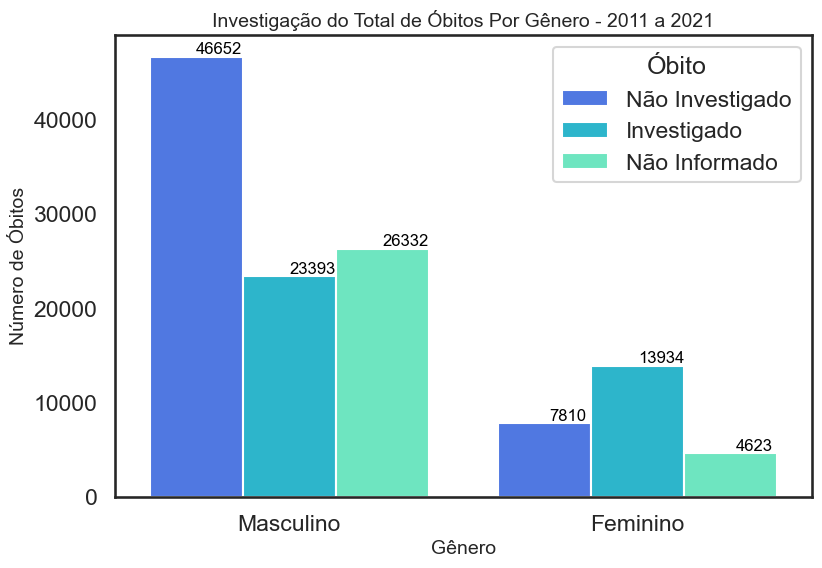

In [202]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'SEXO', hue='TPPOS', data=dadosgeral_final) 

figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Óbito')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("Gênero", fontsize = 14)

# Título
figx.axes.set_title('Investigação do Total de Óbitos Por Gênero - 2011 a 2021', fontsize = 14)

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### No quesito investigação, dentre os registros com a respectiva informação cadastrada, observa-se que os óbitos de pessoas do sexo feminino tiveram maior número de investigaçã em detrimento aos casos do sexo masculino.

In [203]:
dfviz_uf_investiga=dadosgeral_final.copy()
dfviz_uf_investiga=dfviz_uf_investiga[dfviz_uf_investiga['REGIAO'] == "Nordeste" ]
dfviz_uf_investiga

,index,ORIGEM,DTOBITO,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CODMUNOCOR,LINHAA,CAUSABAS,DTATESTADO,FONTE,TPPOS,ANO,IDADEOBITO,FAIXAETARIA,CATEGORIACAUSA,MUNICIPIO,UF,REGIAO
30,30,Oracle,2011-08-02,Feminino,Branca,Viuvo,Desconhecida,270200,Hospital,270030,X689,X689,2011-09-02,Desconhecida,Não Informado,2011,70,60+,X68,COITE DO NOIA,AL,Nordeste
31,31,Oracle,2011-07-01,Feminino,Parda,Viuvo,Desconhecida,270030,Domicílio,270030,T600,X689,2011-07-01,Desconhecida,Não Informado,2011,37,20-39,X68,ARAPIRACA,AL,Nordeste
32,32,Oracle,2011-02-14,Masculino,Parda,Divorciado,Desconhecida,270200,Outros,270200,X709,X709,2011-02-15,Desconhecida,Não Informado,2011,54,40-59,X70,COITE DO NOIA,AL,Nordeste
33,33,Oracle,2011-02-17,Masculino,Parda,Solteiro,Desconhecida,270400,Domicílio,270400,T71X,X700,2011-02-18,Desconhecida,Não Informado,2011,20,20-39,X70,JUNQUEIRO,AL,Nordeste
34,34,Oracle,2011-07-01,Feminino,Parda,Viuvo,Desconhecida,270430,Hospital,270430,T659,X649,2011-07-01,Hospital,Não Informado,2011,68,60+,X64,MACEIO,AL,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123009,123009,Oracle,2021-07-23,Masculino,Parda,Solteiro,Sem Escolaridade,280300,Outros,280300,J80X,X709,2021-07-24,Ocorrência Policial,Não Investigado,2021,46,40-59,X70,ITABAIANINHA,SE,Nordeste
123010,123010,Oracle,2021-07-28,Feminino,Parda,Solteiro,De 8 a 11 anos,280290,Domicílio,280290,X610,X610,2021-07-28,Ocorrência Policial,Investigado,2021,17,15-19,X61,ITABAIANA,SE,Nordeste
123011,123011,Oracle,2021-08-28,Feminino,Parda,Solteiro,Sem Escolaridade,280220,Hospital,280030,X680,X680,2021-08-29,Hospital,Não Investigado,2021,80,60+,X68,FEIRA NOVA,SE,Nordeste
123012,123012,Oracle,2021-08-22,Feminino,Parda,Solteiro,De 4 a 7 anos,280130,Domicílio,280130,J80X,X700,2021-08-23,Ocorrência Policial,Investigado,2021,38,20-39,X70,CAPELA,SE,Nordeste


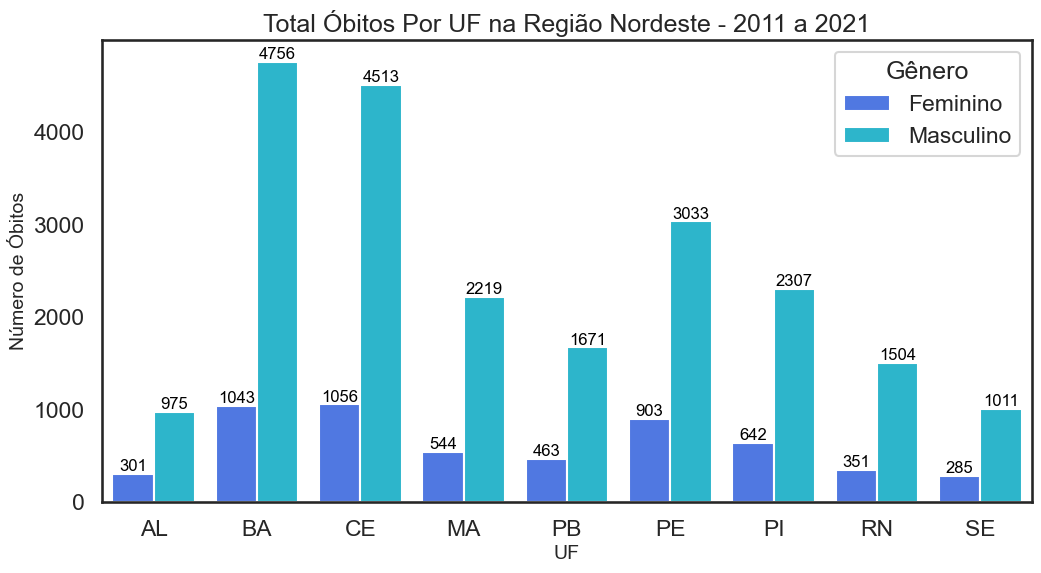

In [204]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'UF', hue='SEXO', data=dfviz_uf_investiga) 

figx.figure.set_size_inches(12,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("UF", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por UF na Região Nordeste - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

In [205]:
dfviz_uf_investiga=dadosgeral_final.copy()
dfviz_uf_investiga=dfviz_uf_investiga[dfviz_uf_investiga['REGIAO'] == "Norte" ]

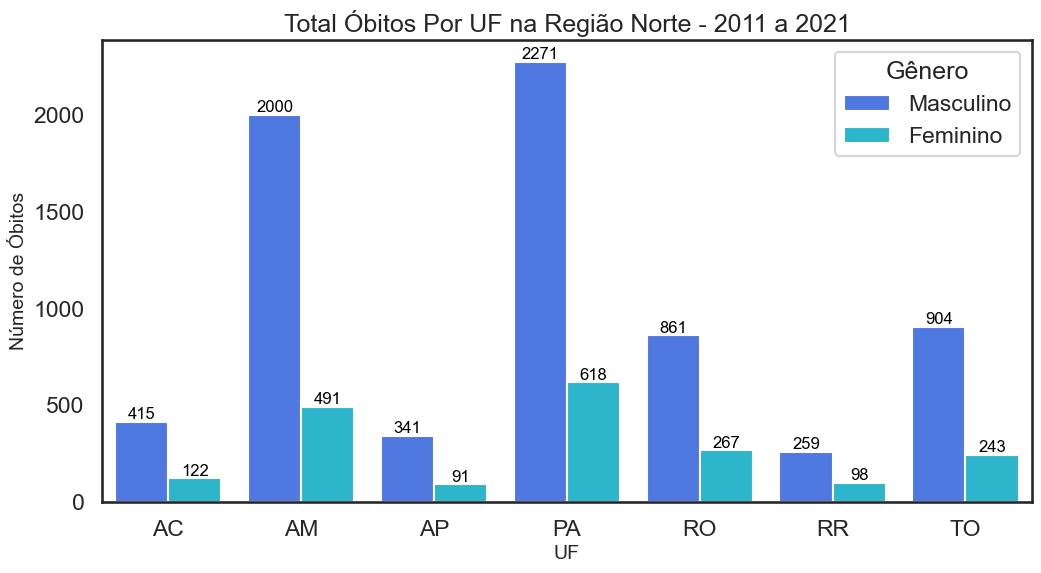

In [206]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'UF', hue='SEXO', data=dfviz_uf_investiga) 

figx.figure.set_size_inches(12,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("UF", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por UF na Região Norte - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()


In [207]:
dfviz_uf_investiga=dadosgeral_final.copy()
dfviz_uf_investiga=dfviz_uf_investiga[dfviz_uf_investiga['REGIAO'] == "Sudeste" ]

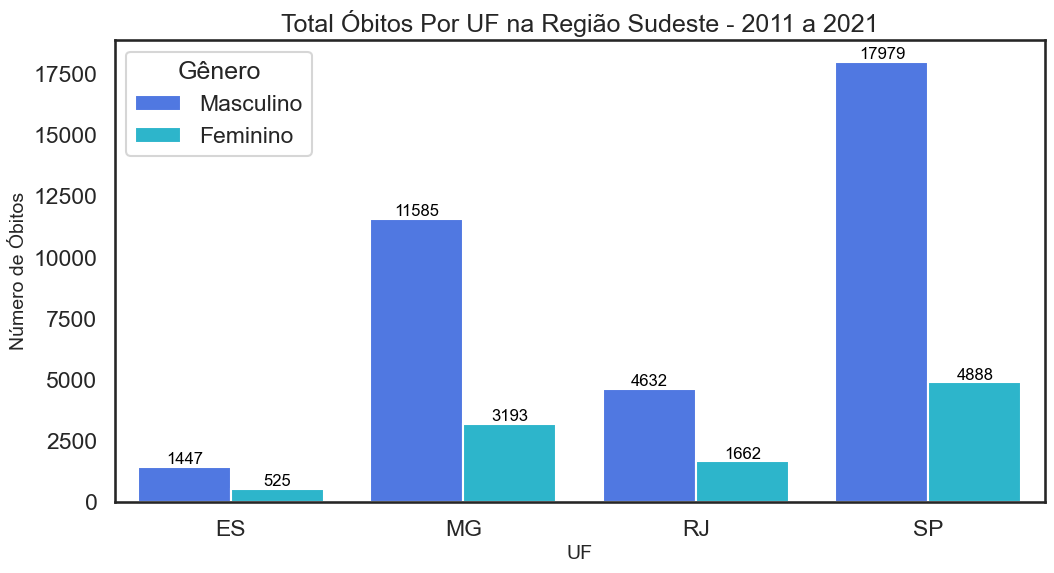

In [208]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'UF', hue='SEXO', data=dfviz_uf_investiga) 

figx.figure.set_size_inches(12,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("UF", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por UF na Região Sudeste - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

In [209]:
dfviz_uf_investiga=dadosgeral_final.copy()
dfviz_uf_investiga=dfviz_uf_investiga[dfviz_uf_investiga['REGIAO'] == "Sul" ]

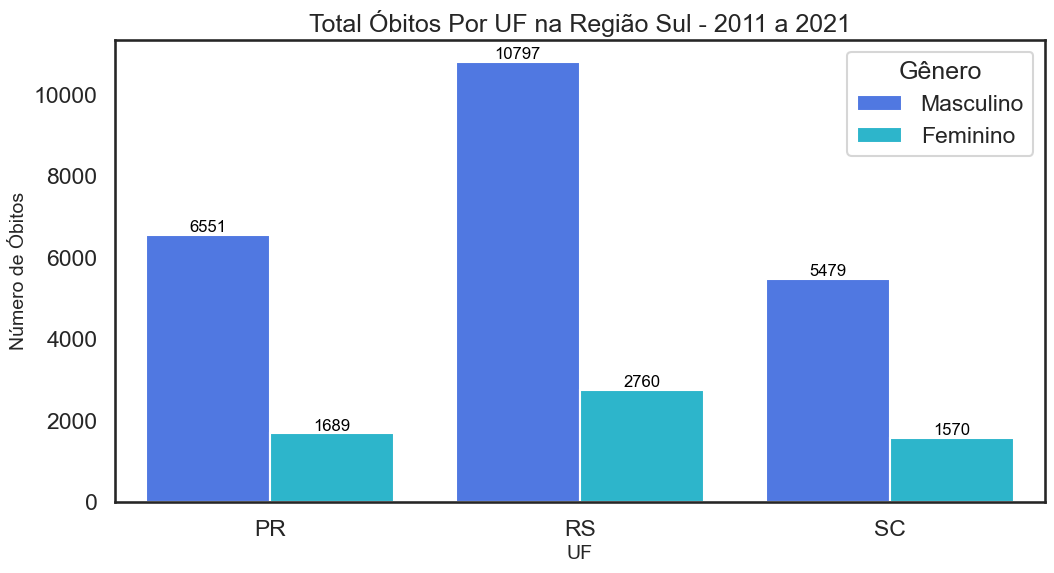

In [210]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'UF', hue='SEXO', data=dfviz_uf_investiga) 

figx.figure.set_size_inches(12,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("UF", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por UF na Região Sul - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

In [211]:
dfviz_uf_investiga=dadosgeral_final.copy()
dfviz_uf_investiga=dfviz_uf_investiga[dfviz_uf_investiga['REGIAO'] == "Centro-Oeste" ]

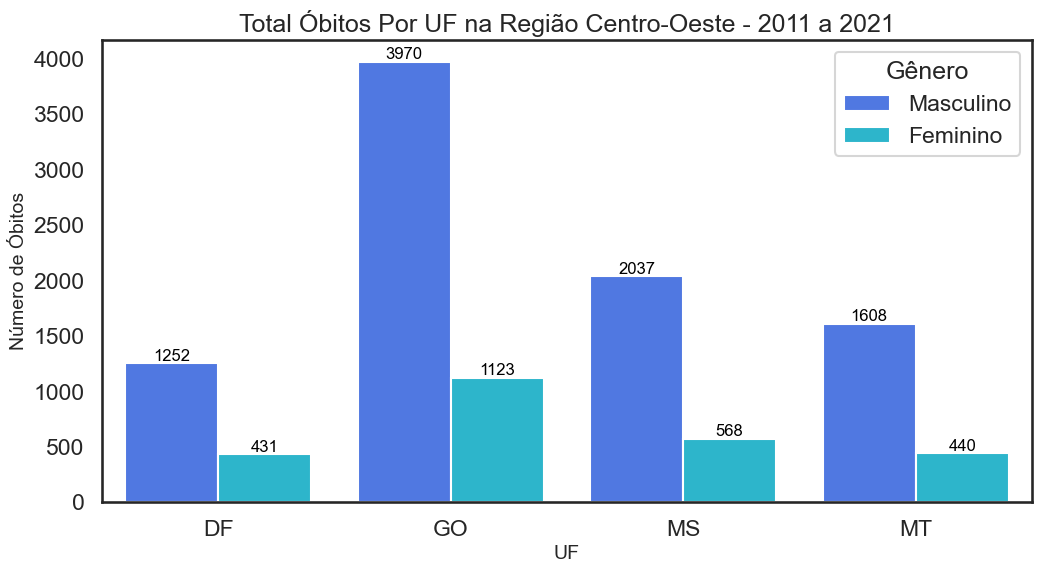

In [212]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = 'UF', hue='SEXO', data=dfviz_uf_investiga) 

figx.figure.set_size_inches(12,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("UF", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por UF na Região Centro-Oeste - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### Ao analisar os óbitos por suicídio entre os sexos nos diferentes estados braisleiros, observa-se que em todas as regiões, o número de homens é muito superior ao número de mulheres. 

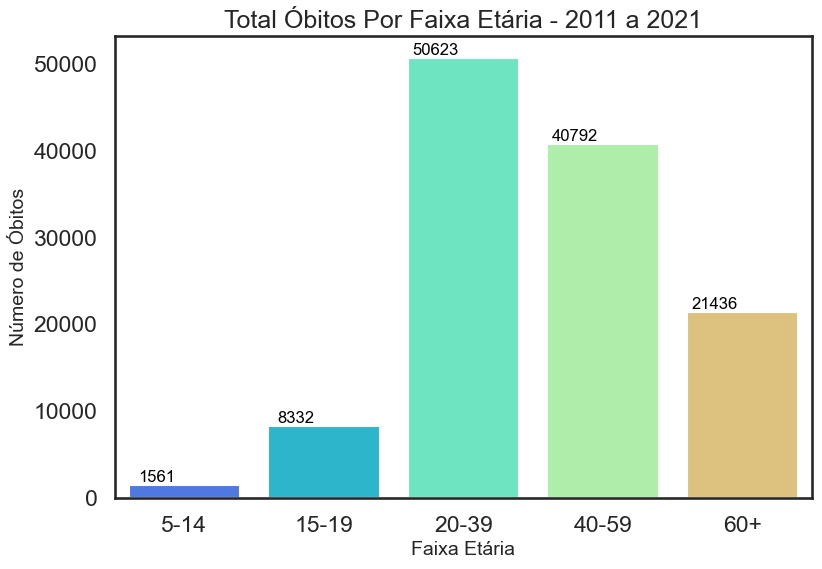

In [213]:
# Definir a ordem categórica desejada da Faixa Etária
ordem_faixa_etaria = pd.CategoricalDtype(categories=['5-14', '15-19', '20-39', '40-59', '60+'], ordered=True)
dadosgeral_final['FAIXAETARIA'] = dadosgeral_final['FAIXAETARIA'].astype(ordem_faixa_etaria)

figx = sns.countplot(x = 'FAIXAETARIA', data=dadosgeral_final) 

figx.figure.set_size_inches(9,6)

# Legenda
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("Faixa Etária", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por Faixa Etária - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### A faixa etária de 20 a 39 anos concentra o maior número de mortes por suicídio.

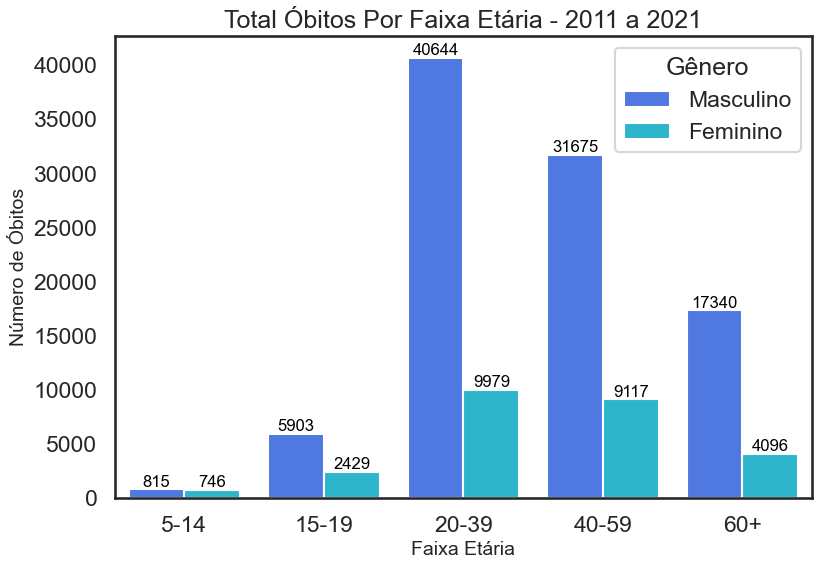

In [214]:
# Definir a ordem categórica desejada da Faixa Etária
ordem_faixa_etaria = pd.CategoricalDtype(categories=['5-14', '15-19', '20-39', '40-59', '60+'], ordered=True)
dadosgeral_final['FAIXAETARIA'] = dadosgeral_final['FAIXAETARIA'].astype(ordem_faixa_etaria)

figx = sns.countplot(x = 'FAIXAETARIA', hue='SEXO', data=dadosgeral_final) 

figx.figure.set_size_inches(9,6)

# Legenda
figx.legend(title = 'Gênero')
plt.ylabel("Número de Óbitos", fontsize = 14)
plt.xlabel("Faixa Etária", fontsize = 14)

# Título
figx.axes.set_title('Total Óbitos Por Faixa Etária - 2011 a 2021')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 12,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

#### Ao analisar os números entre os sexos e sua respectiva faixa etária, observou-se que apenas nas idades entre 5 e 14 anos não existe diferença significativa entre os gêneros.

In [215]:
dfviz_uf= dadosgeral_final.copy()
dfviz_uf = dfviz_uf.groupby(['REGIAO','SEXO','FAIXAETARIA'], as_index=False)['index'].count()
dfviz_uf.columns = ['REGIAO', 'SEXO','FAIXAETARIA','CONTADOR']
dfviz_uf

,REGIAO,SEXO,FAIXAETARIA,CONTADOR
0,Centro-Oeste,Feminino,5-14,105
1,Centro-Oeste,Feminino,15-19,316
2,Centro-Oeste,Feminino,20-39,1079
3,Centro-Oeste,Feminino,40-59,774
4,Centro-Oeste,Feminino,60+,288
5,Centro-Oeste,Masculino,5-14,129
6,Centro-Oeste,Masculino,15-19,741
7,Centro-Oeste,Masculino,20-39,4037
8,Centro-Oeste,Masculino,40-59,2591
9,Centro-Oeste,Masculino,60+,1369


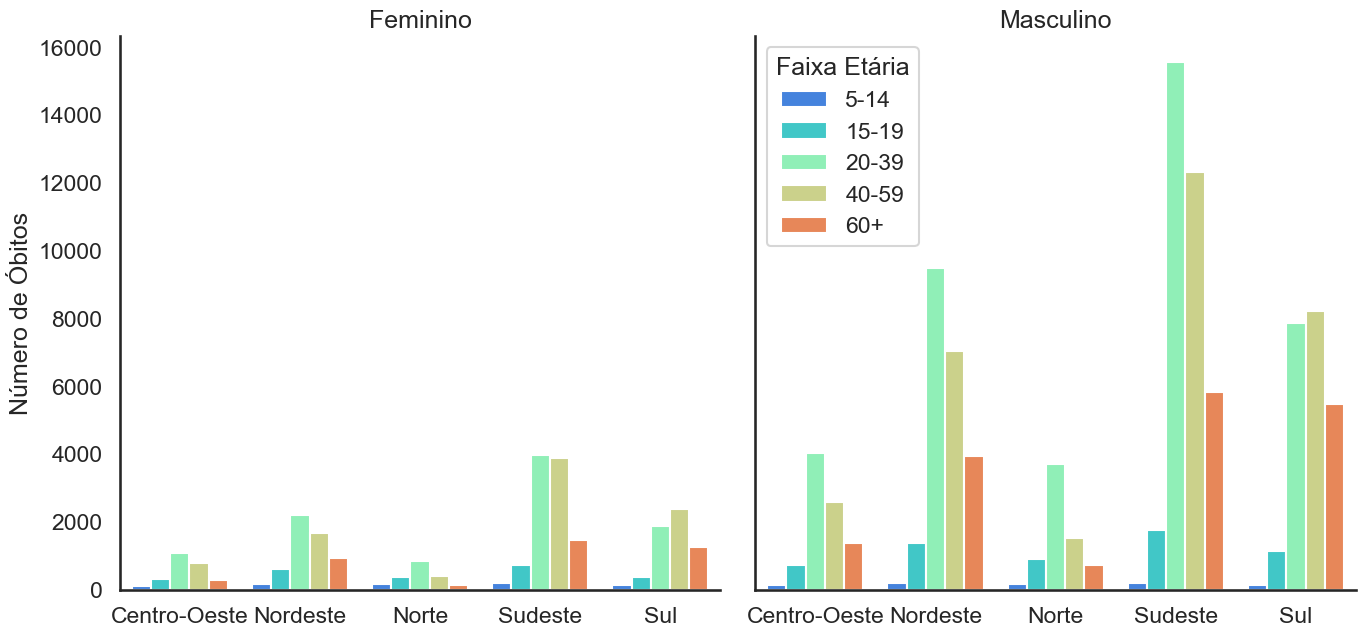

In [216]:
# Background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
g = sns.catplot(x = 'REGIAO', 
                y = 'CONTADOR', 
                hue = 'FAIXAETARIA', 
                col = 'SEXO',
                estimator = np.sum, 
                data = dfviz_uf, 
                palette = "rainbow", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Número de Óbitos")
 .set_titles("{col_name}"))


# Legenda
plt.legend(title = 'Faixa Etária', loc = 'upper left')

# Mostra o gráfico
plt.show(g)

#### Ao analisar as diferenças entre as regiões brasileiras, considerando os gêneros e faixas etárias observou-se que apenas na região Sul a faixa etária de 20 a 39 anos não corresponde a maioria dos óbitos por suicídio, destacando-se a faixa etária de 40 a 59 anos, e neste caso para ambos os sexos.

In [217]:
dfviz_local=dadosgeral_final.groupby(['LOCOCOR'], as_index=False)['index'].count()
dfviz_local.columns = ['LOCAL', 'OBITOS']
dfviz_local

,LOCAL,OBITOS
0,Aldeia Indígena,33
1,Domicílio,76747
2,Hospital,17226
3,Outros,19356
4,Outros locais de saúde,1906
5,Via Pública,7476


In [218]:
dfviz_hospital = dadosgeral_final[dadosgeral_final['LOCOCOR'] == 'Hospital']
dfviz_hospital = dfviz_hospital.groupby(['CATEGORIACAUSA'], as_index=False)['index'].count().sort_values(by=['index'], ascending=False)
dfviz_hospital. columns=['CAUSA', 'CONTADOR']
dfviz_hospital

,CAUSA,CONTADOR
15,X70,3742
13,X68,2876
9,X64,1452
21,X76,1439
6,X61,1373
14,X69,1361
19,X74,1233
25,X80,1173
29,X84,561
23,X78,542


#### Ao analisar os óbitos cometidos por suicídios em hospital, destaca-se causas diferentes daquelas 5 (cinco) principais causas identificadas quando se inclue todos os locais, coincidindo a causa da maioria que está categorizada por X70, as demais, são elas:
* X70: Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação;
* X68: Auto-intoxicação por e exposição, intencional, a pesticidas;
* X64: Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas;
* X76: Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas;
* X61: Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes [antiepilépticos] sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte;
* X69: Auto-intoxicação por exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas.

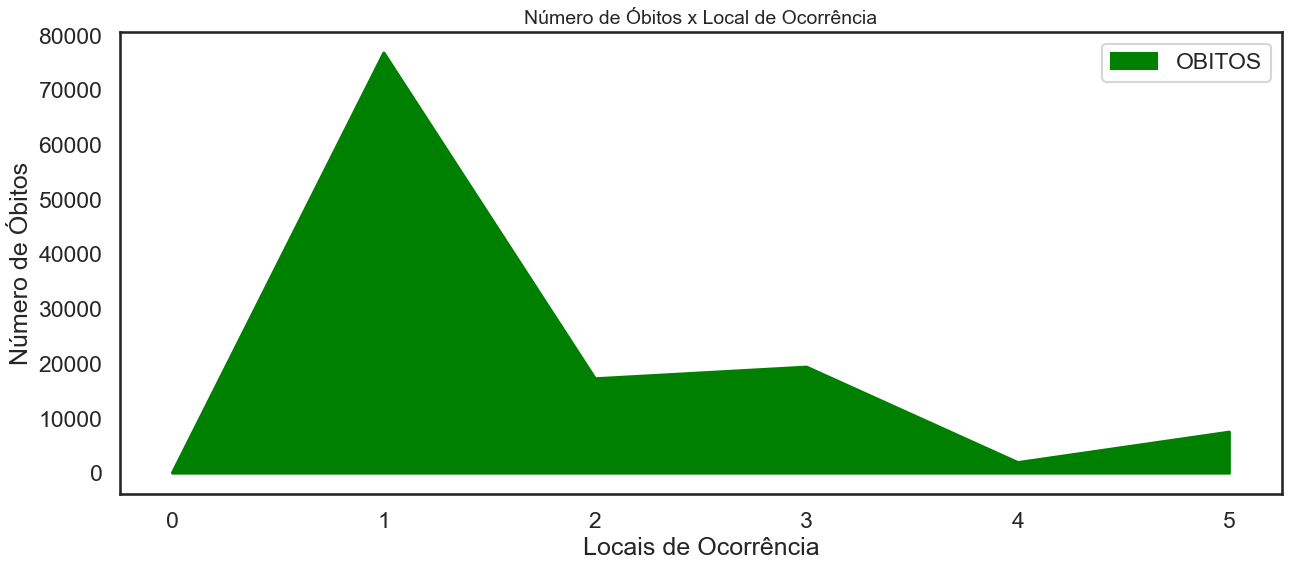

0           Aldeia Indígena
1                 Domicílio
2                  Hospital
3                    Outros
4    Outros locais de saúde
5               Via Pública
Name: LOCAL, dtype: object


In [219]:
# Cria o gráfico
fig = dfviz_local.plot(kind = 'area', figsize = (15,6), color = 'Green', xlabel='Locais de Ocorrência', ylabel = 'Número de Óbitos')

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Óbitos x Local de Ocorrência", fontsize = 14)
plt.show()

print(dfviz_local['LOCAL'])

#### A maioria das pessoas se suicidaram em casa.

In [220]:
dfviz_raca=dadosgeral_final.copy()
dfviz_raca=dfviz_raca.groupby(['REGIAO','UF','RACACOR'], as_index=False)['index'].count()
dfviz_raca.columns = ['REGIAO', 'UF','RACACOR','CONTADOR']
dfviz_raca.head(130)

,REGIAO,UF,RACACOR,CONTADOR
0,Centro-Oeste,DF,Amarela,7
1,Centro-Oeste,DF,Branca,635
2,Centro-Oeste,DF,Indígena,2
3,Centro-Oeste,DF,Parda,965
4,Centro-Oeste,DF,Preta,74
...,...,...,...,...
125,Sul,RS,Preta,571
126,Sul,SC,Amarela,7
127,Sul,SC,Branca,6334
128,Sul,SC,Indígena,17


In [221]:
# Criando Gráfico por Raça e Região (Centro-Oeste)
dfviz_raca_regiao=dfviz_raca[dfviz_raca['REGIAO'] == "Centro-Oeste" ]

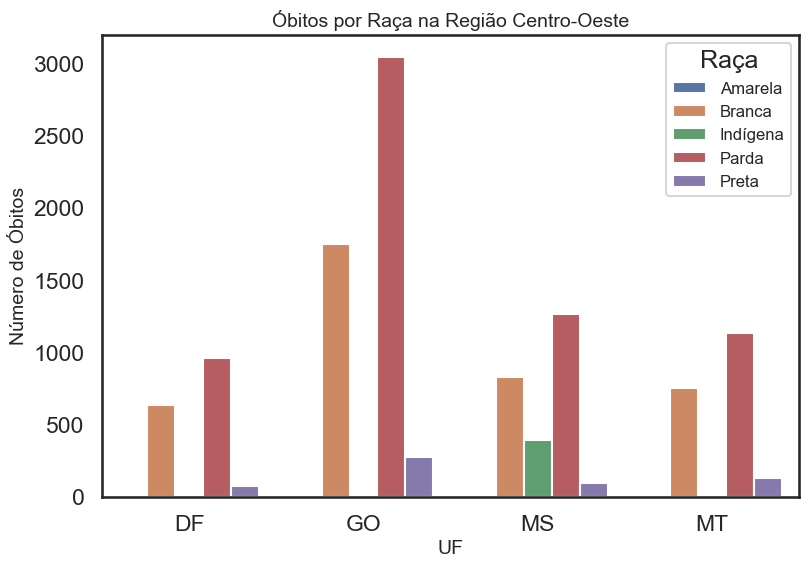

In [222]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x='UF', y='CONTADOR', hue='RACACOR', data=dfviz_raca_regiao)
ax.set_title('Óbitos por Raça na Região Centro-Oeste', fontsize = 14)
ax.set_xlabel('UF', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Raça', fontsize=12)

#### Nos estados da região Centro-Oeste, segundo a raça-cor da pele, entre os anos de 2011 e 2021, os indíviduos identificados com a cor de pele parda foram os mais acometidos pelo suicídio.

In [223]:
# Criando Gráfico por Raça e Região (Nordeste)
dfviz_raca_regiao=dfviz_raca[dfviz_raca['REGIAO'] == "Nordeste" ]

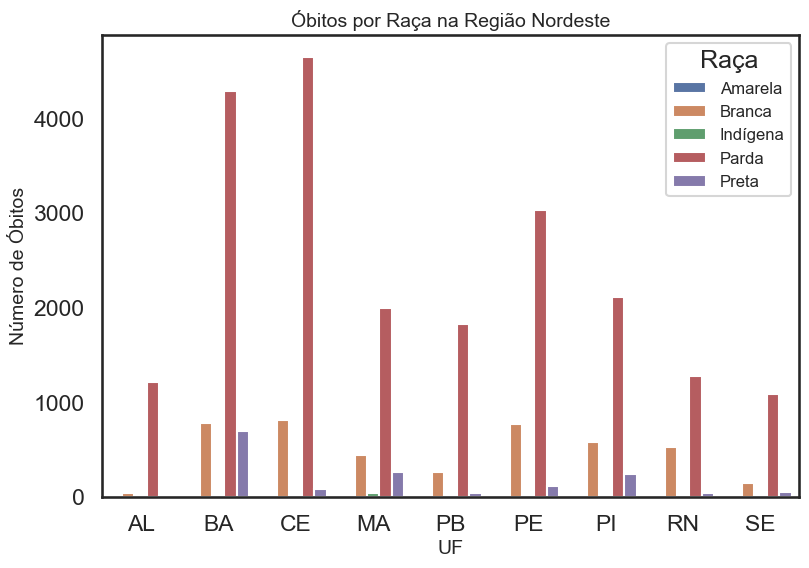

In [224]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x='UF', y='CONTADOR', hue='RACACOR', data=dfviz_raca_regiao)
ax.set_title('Óbitos por Raça na Região Nordeste', fontsize = 14)
ax.set_xlabel('UF', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Raça', fontsize=12)

#### Nos estados da região Nordeste, segundo a raça-cor da pele, entre os anos de 2011 e 2021, os indíviduos identificados com a cor de pele parda foram os mais acometidos pelo suicídio.

In [225]:
# Criando Gráfico por Raça e Região (Norte)
dfviz_raca_regiao=dfviz_raca[dfviz_raca['REGIAO'] == "Norte" ]

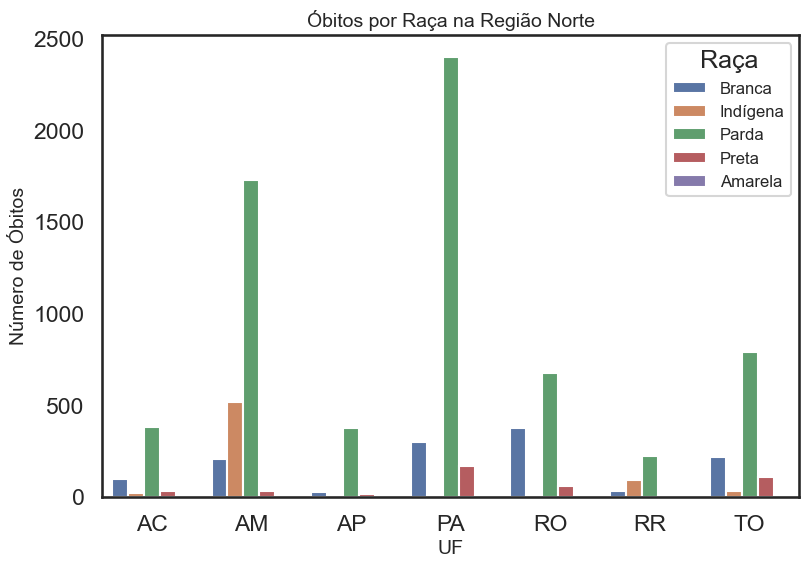

In [226]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x='UF', y='CONTADOR', hue='RACACOR', data=dfviz_raca_regiao)
ax.set_title('Óbitos por Raça na Região Norte', fontsize = 14)
ax.set_xlabel('UF', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Raça', fontsize=12)

#### Nos estados da região Norte, segundo a raça-cor da pele, entre os anos de 2011 e 2021, os indíviduos identificados com a cor de pele parda foram os mais acometidos pelo suicídio.

In [227]:
# Criando Gráfico por Raça e Região (Sudeste)
dfviz_raca_regiao=dfviz_raca[dfviz_raca['REGIAO'] == "Sudeste" ]

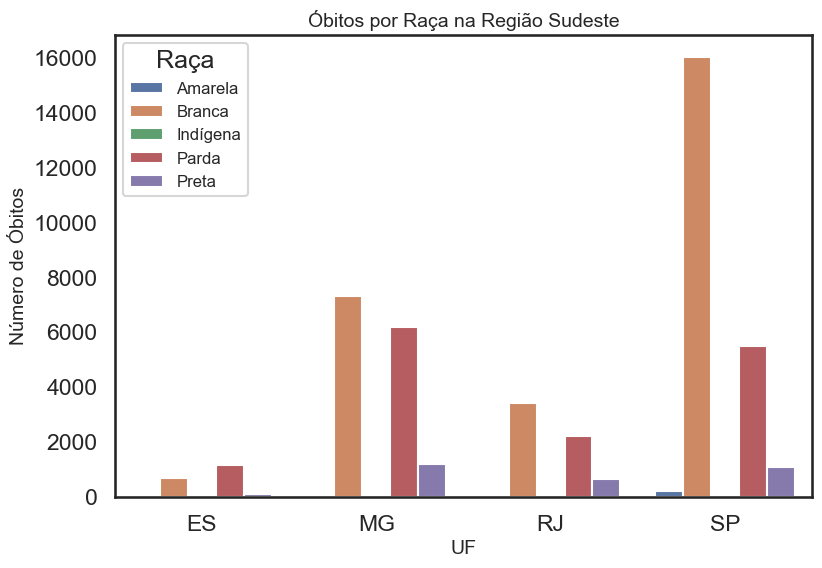

In [228]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x='UF', y='CONTADOR', hue='RACACOR', data=dfviz_raca_regiao)
ax.set_title('Óbitos por Raça na Região Sudeste', fontsize = 14)
ax.set_xlabel('UF', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Raça', fontsize=12)

#### Dentre os estados da região Sudeste, segundo a raça-cor da pele, considerando as diferenças regionais, os indíviduos identificados com a cor de pele branca foram os mais acometidos pelo suicídio, com exceção do estado do Espírito Santo que apresentou a maioria de pessoas de cor parda.

In [229]:
# Criando Gráfico por Raça e Região (Sul)
dfviz_raca_regiao=dfviz_raca[dfviz_raca['REGIAO'] == "Sul" ]

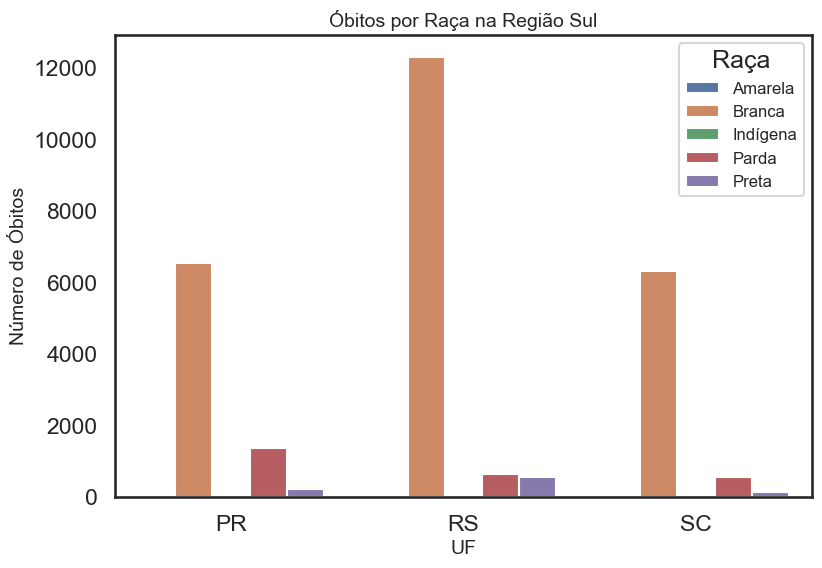

In [230]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x='UF', y='CONTADOR', hue='RACACOR', data=dfviz_raca_regiao)
ax.set_title('Óbitos por Raça na Região Sul', fontsize = 14)
ax.set_xlabel('UF', fontsize = 14)
ax.set_ylabel('Número de Óbitos', fontsize = 14)
plt.legend(title = 'Raça', fontsize=12)

#### Nos estados da região Sul, segundo a raça-cor da pele, considerando a maioria de sua população branca, com menor taxa de miscigenação, os indíviduos identificados com a cor de pele branca foram os mais acometidos pelo suicídio.

## 5. Conclusão

Dentre os dados coletados do DATASUS, no primeiro ano analisado, ano de 2011, o número de óbitos correspondeu a 8.926 vidas interrompidas pelo suicídio, já em 2021, último ano analisado, este número correspondeu a 14.514 óbitos, representando assim um crescimento muito significativo de 62.6%, considerando que de 2011 (192,3 milhões de habitantes) a 2021 (213,3 milhões de pessoas), o Brasil apresentou um crescimento populacional aproximado de apenas 11%, segundo dados do IBGE.

Ao analisar os dados, identifica-se no Brasil um aumento crescente no número de suicídios ao longo dos anos de 2011 a 2021.

Ainda, observa-se que o aumento da taxa de suicídios apresenta algumas particularidades entre as diferentes regiões e estados brasileiros, tendo crescimento mais acentuado nas regiões nordeste e sudeste.

Foram analisadas as 5 (cinco) categorias das causas de óbitos com maior ocorrência, as quais em sua totalidade representaram 85.3 % do total de óbitos, sendo elas descritas abaixo:

* X70: Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação;
* X74: Lesão autoprovocada intencionalmente por disparo de outra arma de fogo e de arma de fogo não especificada;
* X80: Lesão autoprovocada intencionalmente por precipitação de um lugar elevado;
* X68: Auto-intoxicação por e exposição, intencional, a pesticidas;
* X72: Lesão autoprovocada intencionalmente por disparo de arma de fogo de mão.

Dessa forma, o método mais utilizado foi enforcamento, estrangulamento e sufocação, seguido por disparo arma de fogo, por precipitação de um lugar elevado e por métodos de auto-intoxicação.

É possível constatar que dentre os estados que obtiveram pelo menos 30% da informação sobre a investigação do óbito cadastrada, os estados do Acre, Amazonas, Mato Grosso do Sul, Rondônia, Roraima, Santa Catarina, Sergipe e São Paulo apresentaram baixo percentual de investigação, tendo investigado menos de 30 % dos óbitos.

No Brasil, no período de 2011 a 2021, dentre os maiores de 18 anos, 51% dos óbitos por suicídio foram de pessoas solteiras, 27.5% estavam casadas, 7.5% divorciadas, 5.3% em União Estável, 3.8% de pessoas viúvas e outras 4.9% com estado civil desconhecido.

Além disso, ao analisar as ocorrências do indivíduo solteiro, dentre os maiores de 18 anos, 62.8% dos óbitos foram de indivíduos com idades entre 20 e 39 anos, 26.9% com idades entre 40 e 59 anos, 6.8% com 60 anos ou mais e 3.5% com idade entre 18 e 19 anos.

Ao obersar os dados considerando a faixa etária, conclui-se que a faixa etária de 20 a 39 anos concentra o maior número de mortes por suicídio.

Foi observado que o mês de Outubro(10) apresenta um aumento crescente no número de óbitos  que se destaca. Constatando-se que o número maior de registros no mês de outubro ocorre em todos os anos da análise, o que sugere uma análise de causa.

Para além disso, entre os dados analisados, constata-se que para os óbitos por suicídio no mês de outubro não há especificidade entre as faixas etárias ao confirmar que a faixa de idade entre 20 e 39 anos permanece como a maioria dos indivíduos acometidos, ao longo dos anos em estudo.

No quesito investigação, dentre os registros com a respectiva informação cadastrada, observa-se que os óbitos de pessoas do sexo feminino tiveram maior número de investigação em detrimento aos casos do sexo masculino.

Ao analisar os óbitos entre os sexos nos diferentes estados braisleiros, observa-se que em todas as regiões, o número de homens é muito superior ao número de mulheres.

Ao analisar os números entre os sexos e sua respectiva faixa etária, observou-se que apenas nas idades entre 5 e 14 anos não existe diferença significativa entre os gêneros.

Ao analisar as diferenças entre as regiões brasileiras, considerando os gêneros e faixas etárias observou-se que apenas na região Sul a faixa etária de 20 a 39 anos não corresponde a maioria dos óbitos por suicídio, destacando-se assim a faixa etária de 40 a 59 anos, e, neste caso, para ambos os sexos.

Ao analisar os locais de ocorrência dos óbitos, a maioria das pessoas se suicidaram em casa, seguido por ocorrências em Hospital e outros locais não informados.

Ao analisar os óbitos cometidos por suicídios em hospital, destaca-se causas diferentes daquelas 5 (cinco) principais causas identificadas quando se inclue todos os locais, coincidindo apenas a causa de maior ocorrência que está categorizada por X70, as demais causas das mortes autoprobovadas em hospital, são elas:
* X70: Lesão autoprovocada intencionalmente por enforcamento, estrangulamento e sufocação;
* X68: Auto-intoxicação por e exposição, intencional, a pesticidas;
* X64: Auto-intoxicação por e exposição, intencional, a outras drogas, medicamentos e substâncias biológicas e às não especificadas;
* X76: Lesão autoprovocada intencionalmente pela fumaça, pelo fogo e por chamas;
* X61: Auto-intoxicação por e exposição, intencional, a drogas anticonvulsivantes (antiepilépticos) sedativos, hipnóticos, antiparkinsonianos e psicotrópicos não classificados em outra parte;
* X69: Auto-intoxicação por exposição, intencional, a outros produtos químicos e substâncias nocivas não especificadas.

Entre os anos de 2011 e 2021, nos estados das regiões Centro-Oeste, Norte e Nordeste segundo a raça-cor da pele, os indíviduos identificados com a cor de pele parda foram os mais acometidos pelo suicídio.

No entanto, dentre os estados da região Sudeste, segundo a raça-cor da pele, considerando as diferenças regionais, os indíviduos identificados com a cor de pele branca foram os mais acometidos pelo suicídio, com exceção do estado do Espírito Santo que apresentou a maioria de pessoas de cor parda.

Nos estados da região Sul, segundo a raça-cor da pele, considerando a maioria de sua população branca, com menor taxa de miscigenação, os indíviduos identificados com a cor de pele branca foram os mais acometidos pelo suicídio.

Os dados coletados e analisados do sistema DATASUS ainda possibilita diferentes observação, tendo em vista a grande quantidade de variáveis, embora ainda se faz necessário uma melhor coleta e notificação dos dados, considerando que muitas características presentes nos formulários ainda estão ausentes.

As informações aqui expostas visam contribuir como parte de estratégias para prevenção do suicídio.